# Enterprise Digital Twin

## Introduction

This notebook introduces an __Enterprise Digital Twin__ for consulting firms that we at [transentis](https://www.transentis.com) are currently working for our internal performance management system.

### What exactly is an Enterprise Digital Twin?

The idea of a digital twin is to create a "digital copy" of your system of interest (e.g. a device, a vehicle, a factory or even an enterprise) that not only allows you to gather information about the system, but also allows you to interact with the system and to test the consequences of changes to the system before they are put into action.

So if you had a digital twin of a railway system and all the trains running on it, you could see which seats are occupied (and by whom), see key operating parameters of the train (such as its speed, weight and energy consumption) and you could answer questions such as "What will happen if the train is delayed by 20 Minutes?").

![Enterprise Digital Twin](images/enterprise_digital_twin.svg)

At the enterprise level, we use the following definition: An Enterprise Digital Twin is a digital representation of the (relevant parts) of your enterprise and its environment that is updated in (near) real-time. It provides an overview of what is going on in the enterprise NOW (based on historical data) and lets you project the current state into the FUTURE (based on computational models).

The key purpose of a digital twin is to aid decision making. It fullfills this purpose by providing you will all relevant information in real time and allowing you to test the potential outcome of decisions before putting them into practice. It also lets you experiment with alternative future scenarios – these can range from changing market conditions, changes to concrete customer situations and revnue streams and changes to your workforce. 

In principle, you could even use the digital twin to enact the decisions you make by connecting it to an _Enterprise API_ that automates those actions – our objective here is to use the enterprise digital twin for _augemented decision making_ and not for _automated decision making_.

### Isn't an Enterprise Digital Twin Just a Simulation Model?

At the basic level, the "predict the future" part of an enterprise digital twin IS a simulation model. What makes it different from "classical", desktop based simulations is that it is directly connected to the "business intelligence" part of the entperprise digital twin, so you can seamlessly project data you have about how your business is performing right now into the future. This makes the experience of actually using the simulation much better and you don't need to tediously download data from your BI systems to (re-)calibrate your simulation model.

This works because the simulation model follows the "API first" principle - the simulation is accessible via a REST API which allows calibration on the fly.

The enterprise digital twin we're presenting here is a simulation model built using [Agent-based modeling](../../abm/abm.ipynb) and [System Dynamics](../../sd-dsl/sddsl.ipynb) modeling. These are rule-based analytical approaches which could be complemented and augmented using statistical analytics techniques

>NOTE: The enterprise digital twin presented here is __work in progress__: we're in the process of extending our internal enterprise digital twin with a simulation model that allows us to project our current business into the future and to explore alternative scenarios. We're reporting our progress via our [__Meetup Series on Business Prototyping__](https://www.transentis.com/resources/business-prototyping-toolkit-meetup). You can find upcoming dates and materials from past events on the [meetup homepage](https://www.transentis.com/resources/business-prototyping-toolkit-meetup).

## Objectives of Our Enterprise Digital Twin

The key objective of our digital twin is to not only provide us with a view of of how business has developed over the past months, but also of what is going on in the business _right now_ and how it _might develop_ in the future:

* our consultants and the client projects they are working on
* our internal innovation and transformation projects that improve our knowledge base and improve our professional services
* our sales pipeline
* our recruiting pipeline

The following causal loop diagram captures the dynamics of professional service firms quite nicely – you can read more about it in our blog post on [A Business Model Blueprint for Professional Service Firms](https://www.transentis.com/blog/a-business-model-blueprint-for-professional-service-firms-the-value-logic).

<div align="center"><img src="images/psf_value_creation.svg" width="80%"></div>

We would like all of this to be summarized using performance indicators:

* _Consulting Capacity._ The number of consulting FTEs
* _Utilization._ The percentage of time that a consulting FTE is busy on client project
* _Consulting Fees._ The average consulting fee (per consulting day).
* _Profit Margins_ The average profit margin.
* _Cash Flow and Cash._ Monthly cash flow and overall cash level.
* _Revenue Risk._ An estimiation of how uncertain or revenue stream is when it is projected into the future.

The following diagram shows how these KPIs fit together using a variation of the DuPont System - you can read more about this in our blog post on [Key Performance Indicators for Professional Service Firms](https://www.transentis.com/blog/key-performance-indicators-in-professional-service-firms):

![Consulting KPIs](./images/psf_kpi.svg)


We use the digital twin to make both strategic decisions as well as operative decisions – hence it needs to give us both an overview of what is going on (at the KPI level), but it also must allow us to drill down to individual projects and consultants, so that we can identify capacity and utilization issues as early as possible.

## Overview of The Model

Given the objectives above, we need a modeling approach that allows us to model the business "bottom up", at the level of individual projects and consultants and of course the agent-based modeling approach is ideal for this.

But we will also need a lot of "KPI accounting", where we track and accumulate information such as the consulting effort spent on projects and the revenue generated through that over different time periods.

System Dynamics is ideal for this, which is why we decided to build our enterprise digital twin using a hybrid modeling approach: the core simulation is built using Agent-based modling and within that model we embed a separate System Dynamics model that keeps track of the key performance indicators.

Currently, all interaction between the Agent-based model and the System Dynamics model is via the Controlling agent: From the perspective of the System Dynamics model, the Controlling agent is an exogenous environment that provides data as a time-series. The Controlling Agents reads back the relevant values form the System Dynamics model in order to make them available for the interactive dashboard.

![Enterprise Digital Twin Model](./images/edt_model.svg)

### Agent-based Model

Agent-based Modeling is used to capture the key elements that make up our consulting business: for now we have consultants, projects and a controlling agent. 

#### Consultant

_Consultants_ are responsible for delivering consulting services to customers in the form of _projects_ – all of the companies revenue is generated through consultants working projects.

Consultants currently have have four states states: _Hired_, _Available_, _Busy_, _Inactive_.

Once an employment contract has been signed, we know a consultant is coming on board at some future date. As long as that date hasn't arrived, the consultant is in the _Hired_ state. 

As soon as they entere the company they become _Available_ and they actively seek projects that are not yet fully staffed.

Once they join a project, the consultants switch in to the _Busy_ state, start expending effort on the project and thus also generate revenue.

As soon as a project the consultant is working on has been completed, consultants switch back into the _Available_ state again and start looking for another project to work on - this can be a client project or, if no consulting project is available, an internal marketing campaign.

A consultant that leaves the company switches into the _Inactive_ state.

#### Project

Projects are the vehicle for delivering consulting services to the client.

All projects have an initial effort assigned to them and also the number of consultants needed to deliver the project.

Projects have both a start date and a deadline: no work can start on a project before the start date and projects always stop when the deadline is reached.

Each project has an associated daily rate, which is charged for each day of work done on the project.

Once the effort allocated to a project is used up through consultants working on the project, there is a certain probability that more effort may be allocated (the concrete probability will depending on the client situation).

Once the project has reached its deadline, it stops - but there is also a certain probability attached to the project that it might lead to one or more follow-on projects (currently this is the key way we generate new business). Within the model, follow-on projects are "spawned" as new project agents.

Projects can have one of the following states:

* _Acquired._ The initial state of a project, i.e. there is a contract with a client and there is an initial effort (budget) assigned to it. But the project is not ready to be started until it reaches the start date.
* _Ready._ The project has reached its start date and is ready to be staffed.
* _Started._ The first consultant has joined the project and delivery of the project has thus started. The project is now generating revenue.
* _Fully_staffed._ All required consultants have joined the project and it is now fully staffed. This means no more consultants can join the project, even if there is still budget available.
* _Completed._ The project is completed - either because the available budget has been used up or because the project has reached its deadline.


#### Controlling

Much like in a real organisation, we need a place in our model where we collect information from individual agents and summarize it in performance indicators.

So while the controlling agent doesn't represent a concrete entity within our enterprise, you could say it represents our controlling activities.

Within our model, the controlling agent gathers the data needed to calculate the relevant performance indicators.

### System Dynamics Model


#### Revenue

* Revenue generated through consultants working project assignments

#### Cost

* Consultant Wages
* Workplace cost
* Overall overhead cost

In [1]:
from BPTK_Py.bptk import bptk 

bptk = bptk()

## A Step by Step Walk Through The Model

To understand now the model works, we will no experiment with the model step-by-step. We'll keep the experiments at the conceptual, "business" level – please do check the code for more details.

The simulation is set to run for two years in monthly timesteps – this is quite a good event horizon for what we want to achieve. Anything shorter will not be long enough to see the effect of "strategic" measures, anything much longer becomes to speculative for our purposes.
 

### A First Look at Projects

Let's get started with the simplest scenario possible: one project and no consultants. 

The following graph shows the projects state over time: It starts in the acquired state and once it reaches the start date in timestep 5, it switches into the _Ready_ state.

Because we don't have any consultants, the project never starts and just remains in the ready state.

Eventually, in timestep 55, the project reaches its deadline and switches into the completed state.

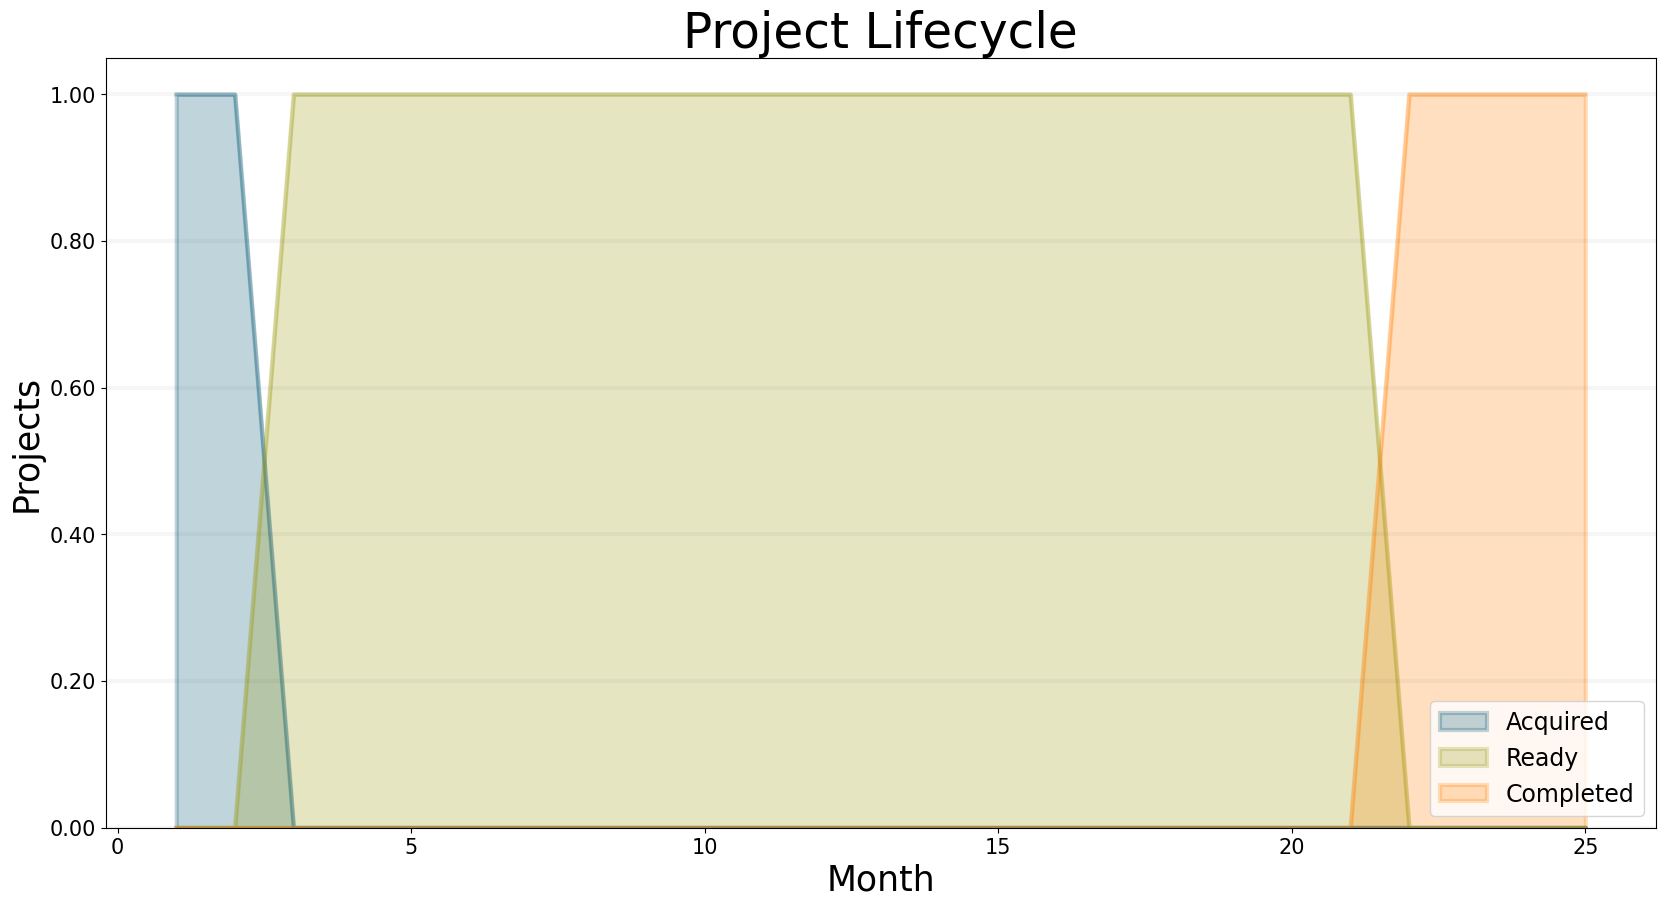

In [2]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_1"],
    title="Project Lifecycle",
    agents=["project"],
    agent_states=["acquired","ready","started","fully_staffed","completed"],
    series_names={
         "smEDT_story_1_project_acquired" : "Acquired",
         "smEDT_story_1_project_ready" : "Ready",
         "smEDT_story_1_project_started" : "Started",
         "smEDT_story_1_project_fully_staffed" : "Fully Staffed",
         "smEDT_story_1_project_completed" : "Completed",
     },
     x_label="Month",
    y_label="Projects",
)

Needless to say we don't make any revenue, because we don't have any consultants to deliver services: we can check this by plotting the revenue property of the controller.

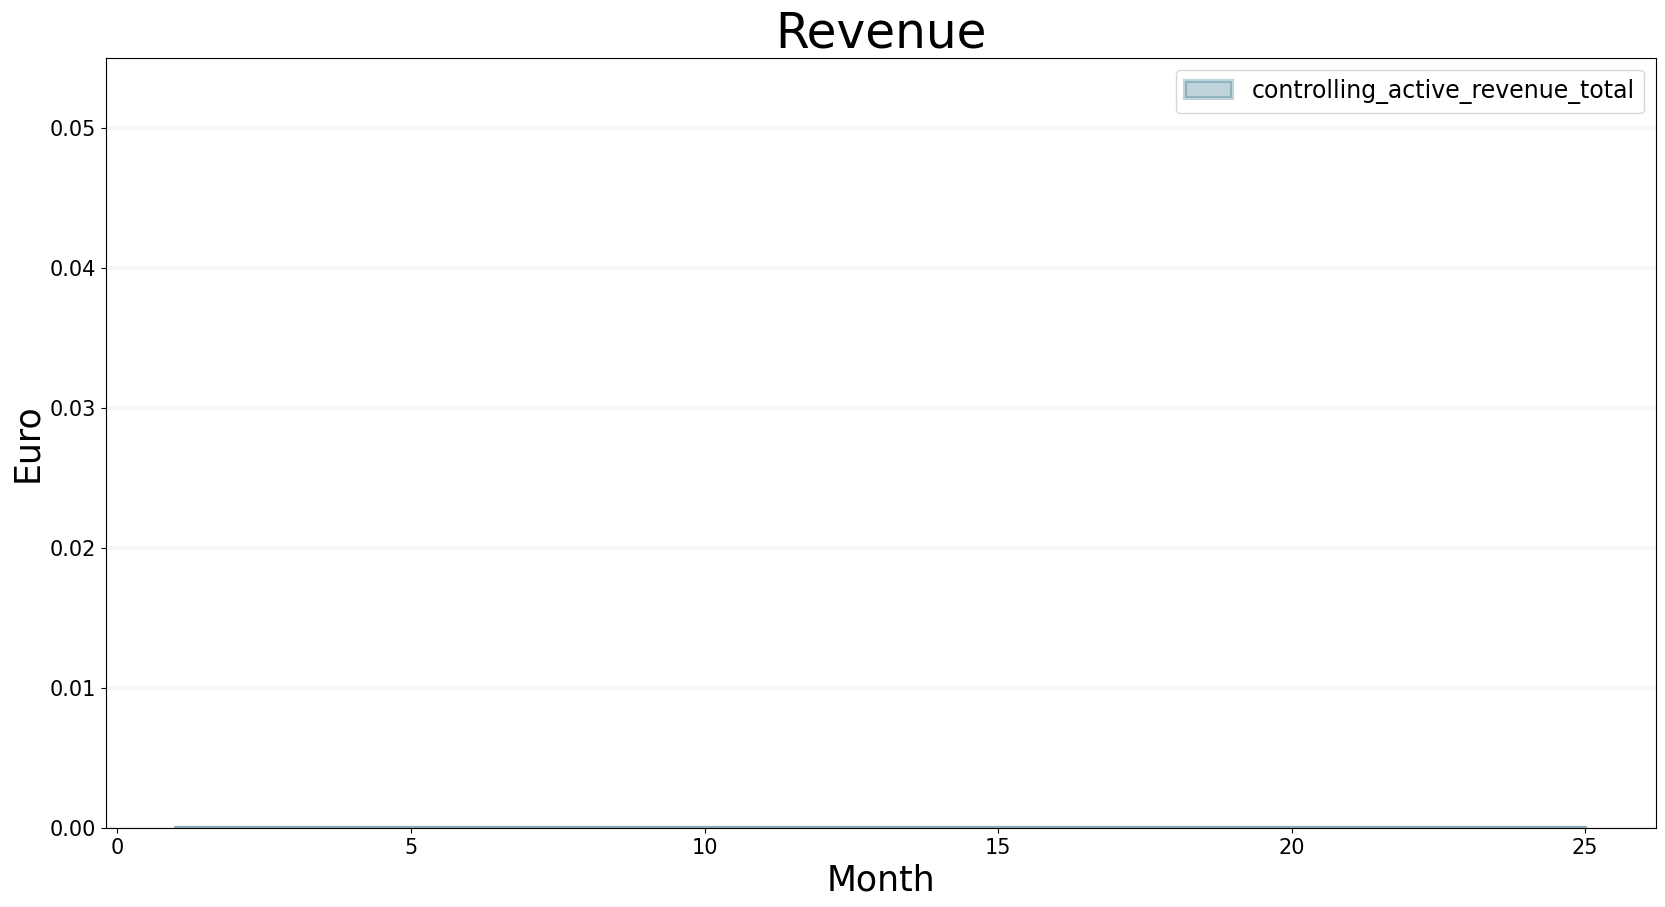

In [3]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_1"],
    title="Revenue",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["revenue"],
    agent_property_types=["total"],
    series_names={
         "smEDT_base_controlling_active_revenue_total" : "Overall Revenue"
     },
     x_label="Month",
    y_label="Euro",

)

### Adding a Consultant

To provide services and generate revenue, we need to add a consultant to our model. The project life cycle shows that now the project actually starts and even gets completed before the deadline ... but it is never fully staffed, because the project actually requires two consultants.

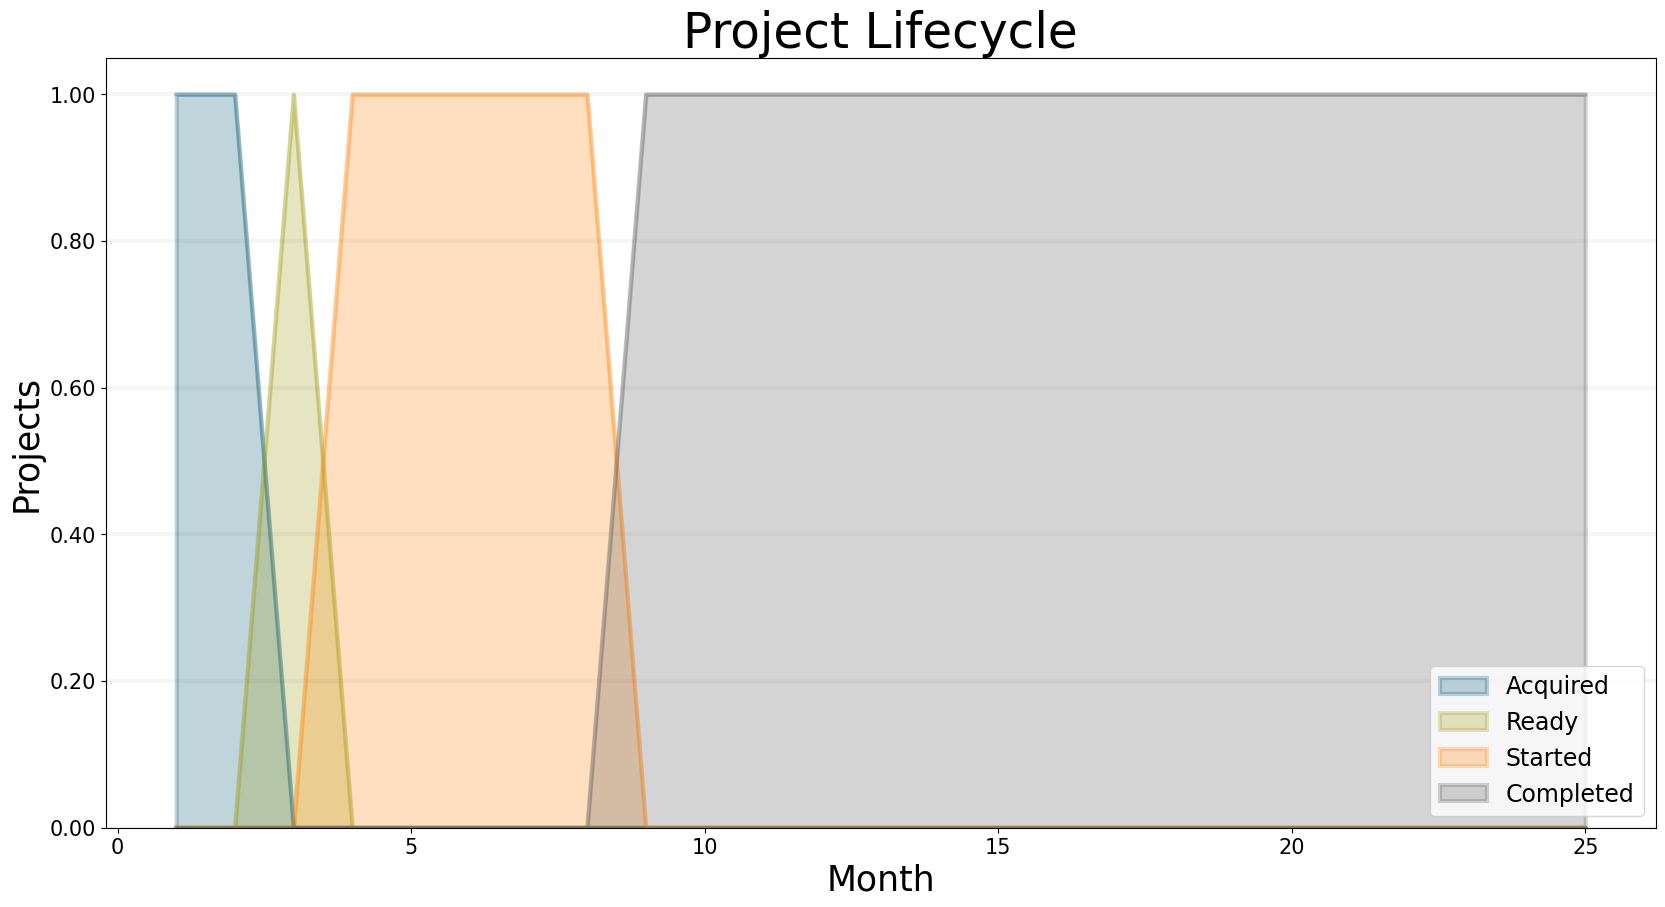

In [4]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_2"],
    title="Project Lifecycle",
    agents=["project"],
    agent_states=["acquired","ready","started","fully_staffed","completed"],
    series_names={
         "smEDT_story_2_project_acquired" : "Acquired",
         "smEDT_story_2_project_ready" : "Ready",
         "smEDT_story_2_project_started" : "Started",
         "smEDT_story_2_project_fully_staffed" : "Fully Staffed",
         "smEDT_story_2_project_completed" : "Completed",
     },
     x_label="Month",
    y_label="Projects",
)

At last we also start to generate some revenue ....

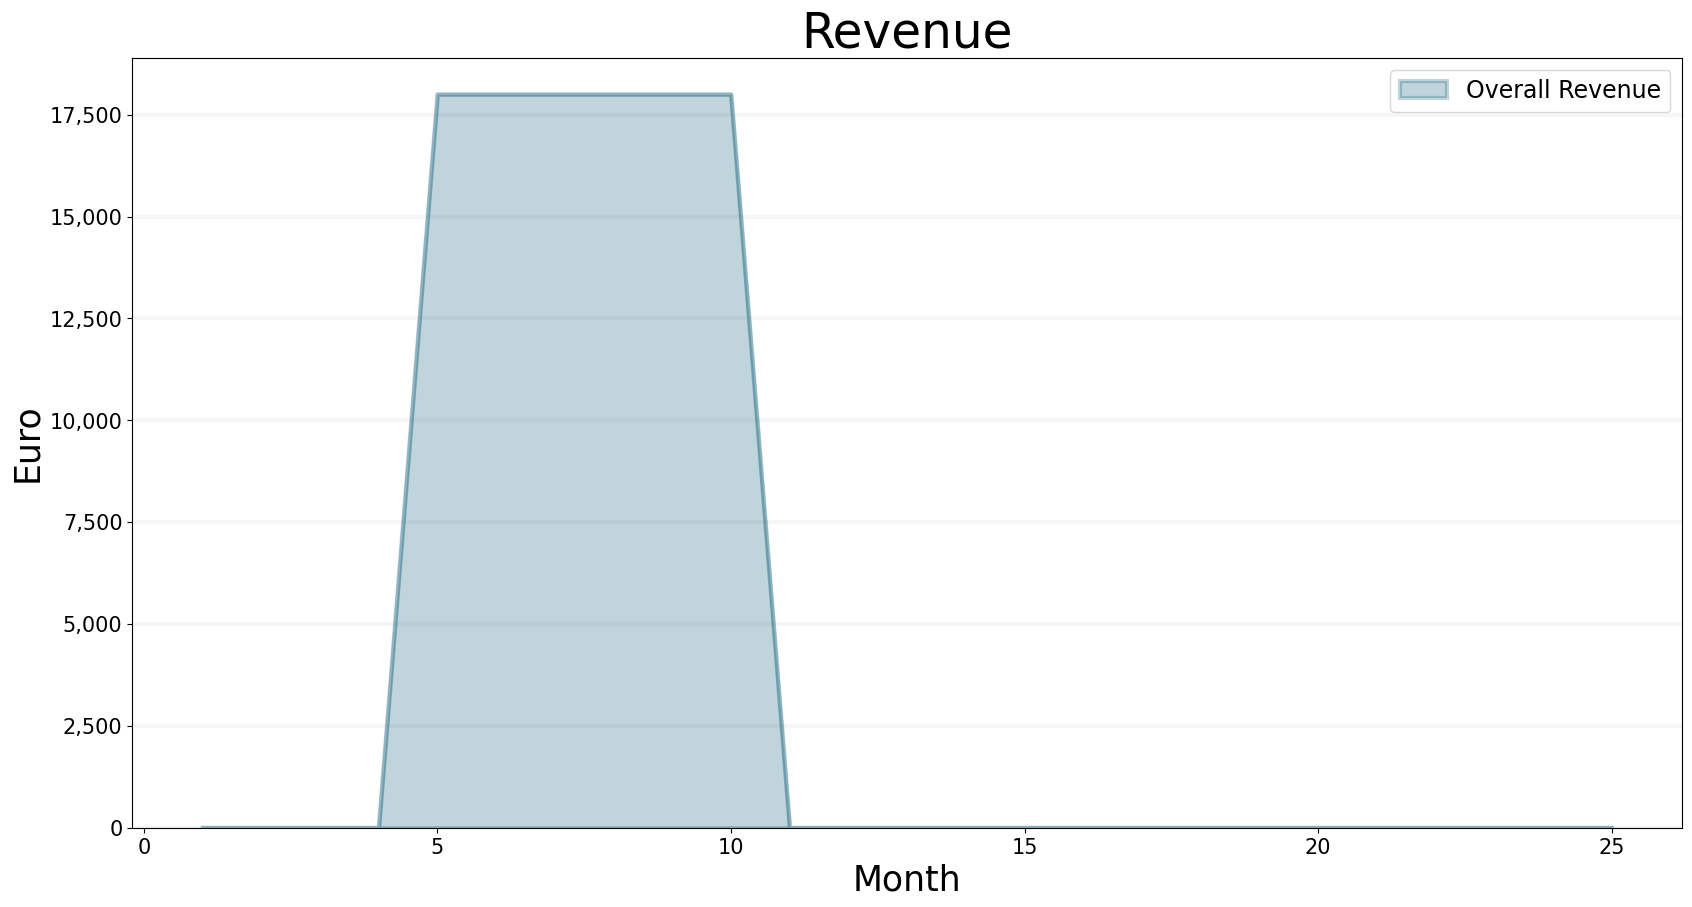

In [5]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_2"],
    title="Revenue",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["revenue"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_2_controlling_active_revenue_total" : "Overall Revenue"
     },
     x_label="Month",
    y_label="Euro",

)

But not enough to make any profit: the following graph shows the earnings per month; unfortunately we are losing money most of the time.

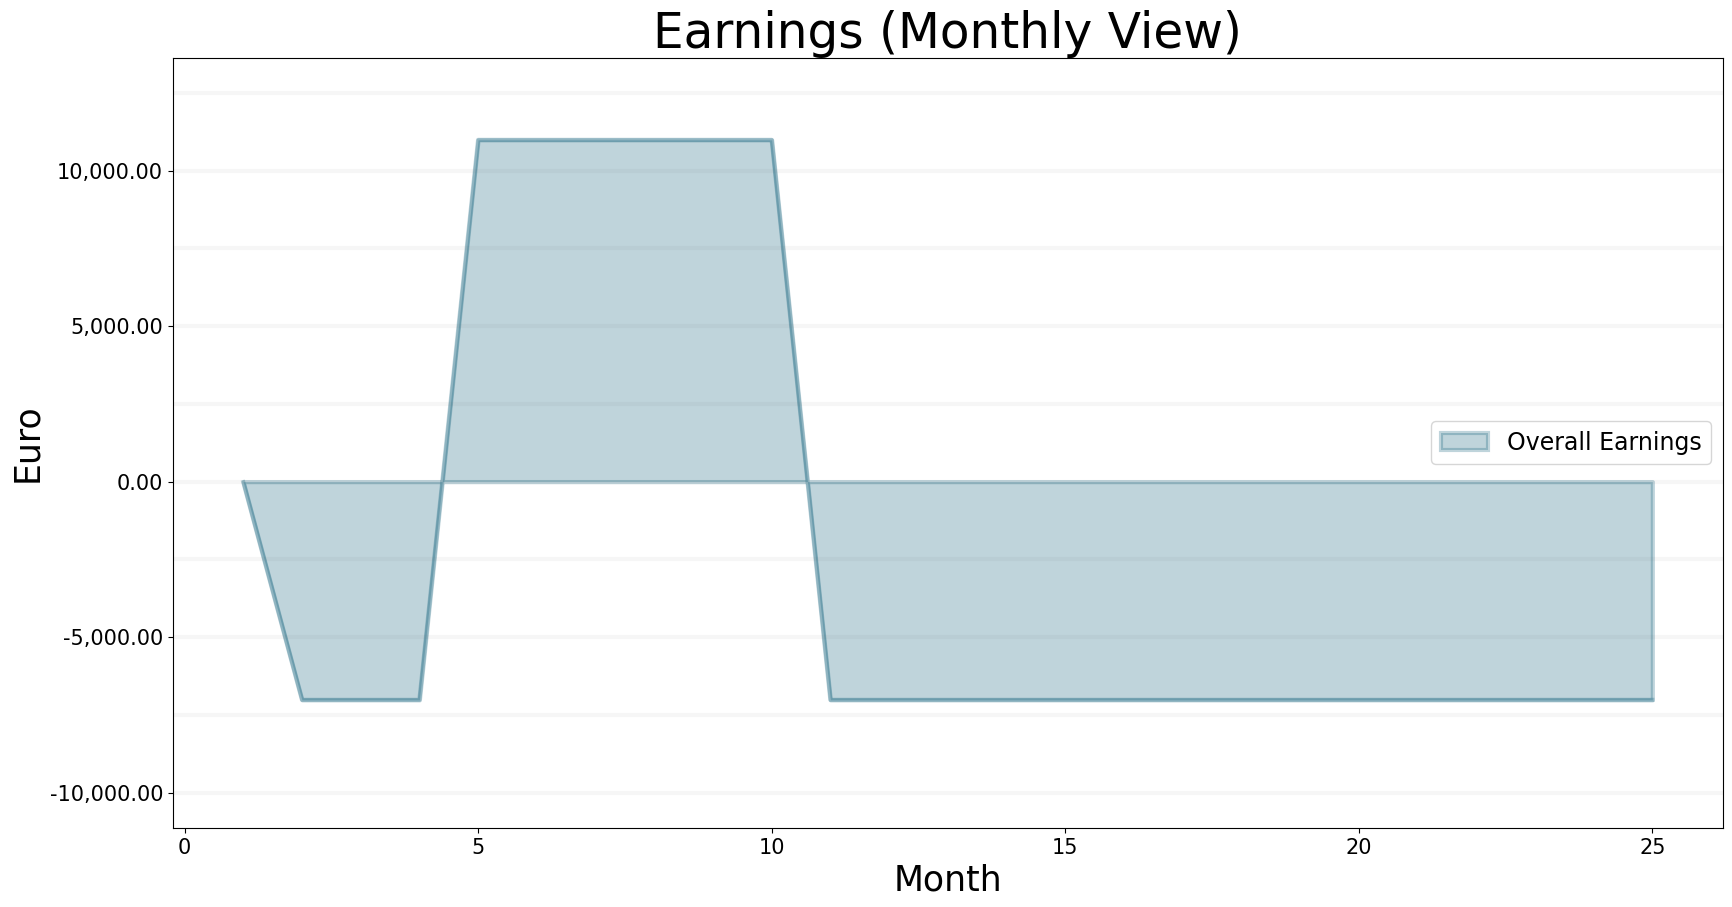

In [6]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_2"],
    title="Earnings (Monthly View)",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["earnings"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_2_controlling_active_earnings_total" : "Overall Earnings"
     },
     x_label="Month",
    y_label="Euro",

)

The accumlated earnings show that we reach break-even quickly once our consultants are working, but 6 months of work are not enough to sustain even the consultant wages in the long run.

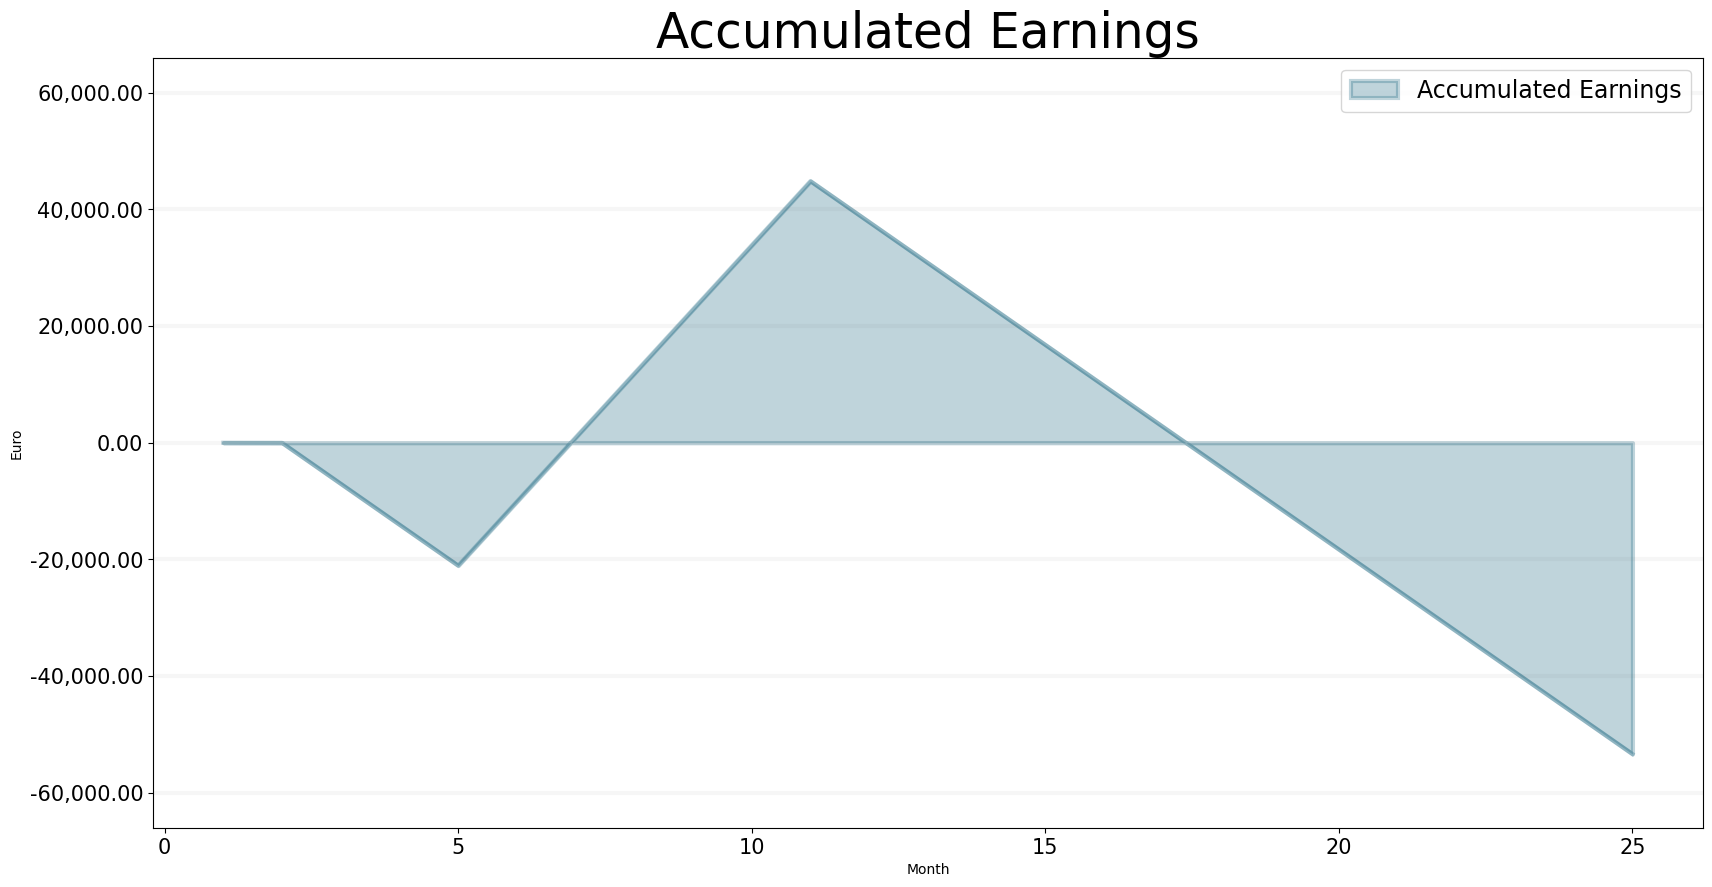

In [7]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_2"],
    title="Accumulated Earnings",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["accumulated_earnings"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_2_controlling_active_accumulated_earnings_total" : "Accumulated Earnings"
     },
     x_label="Month",
    y_label="Euro",

)

### Adding Another Consultant

Here we add another consultant and now the project becomes fully staffed - and finishes even sooner.

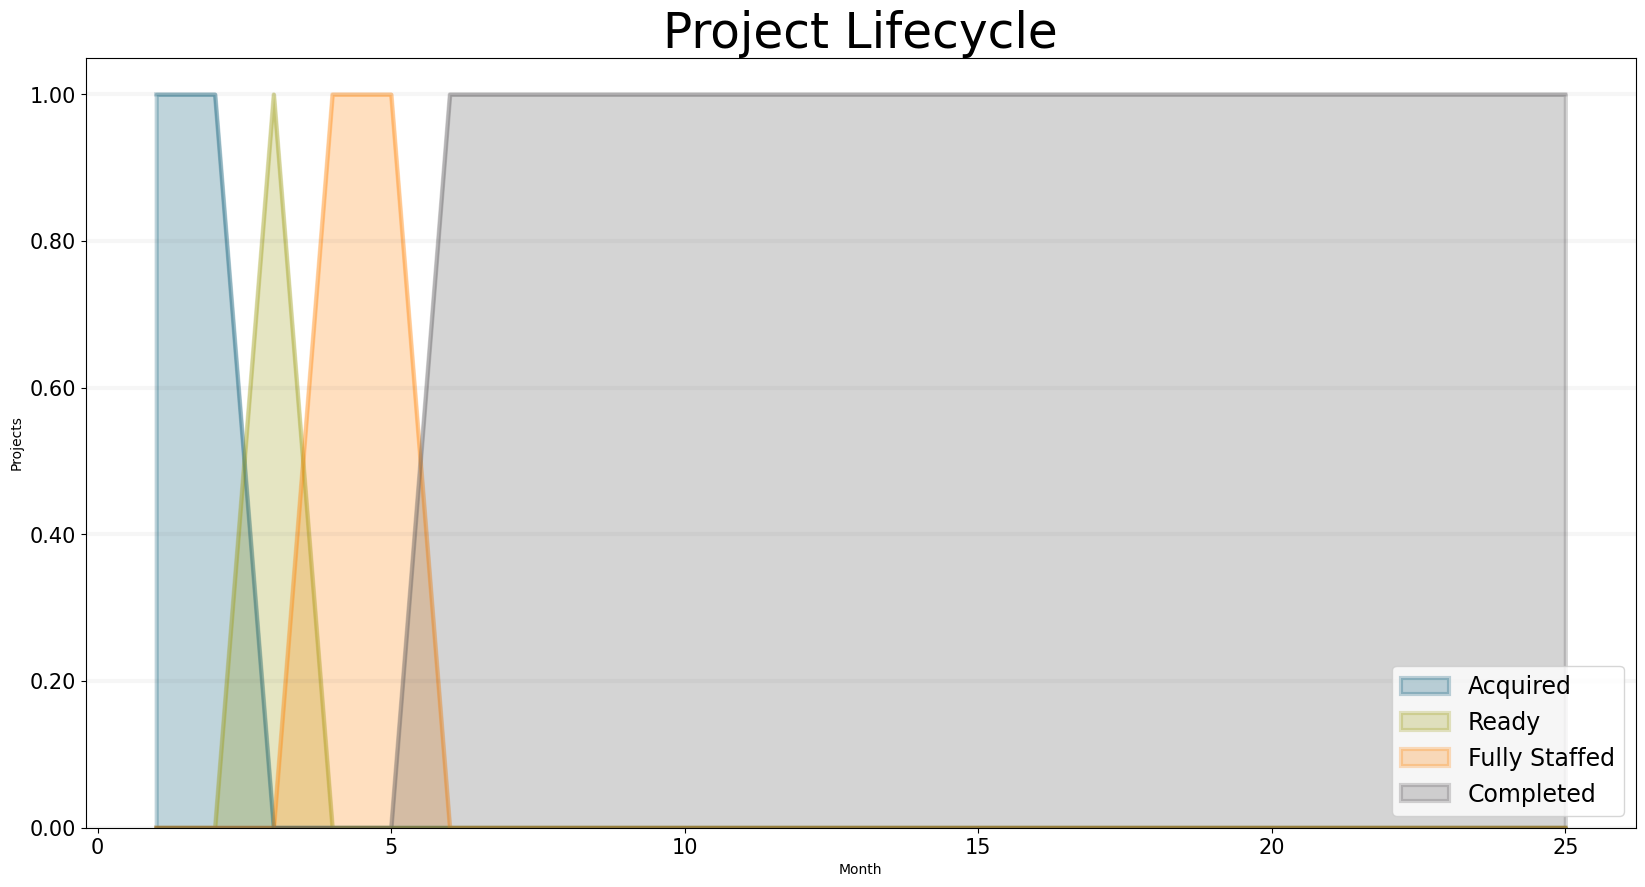

In [8]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_3"],
    title="Project Lifecycle",
    agents=["project"],
    agent_states=["acquired","ready","started","fully_staffed","completed"],
    series_names={
         "smEDT_story_3_project_acquired" : "Acquired",
         "smEDT_story_3_project_ready" : "Ready",
         "smEDT_story_3_project_started" : "Started",
         "smEDT_story_3_project_fully_staffed" : "Fully Staffed",
         "smEDT_story_3_project_completed" : "Completed",
     },
     x_label="Month",
    y_label="Projects",
)

### Budget extensions, Follow-on Projects and the Concept of Revenue Risk

Now we assume that there is a certain probabiliy that a projects budget (effort) is extended while it hasn't reached it's deadline.

And once the project has reached it's deadline, there is a probability that it leads to follow on projects.

We can immediately see how the number of projects changes in the graph below:

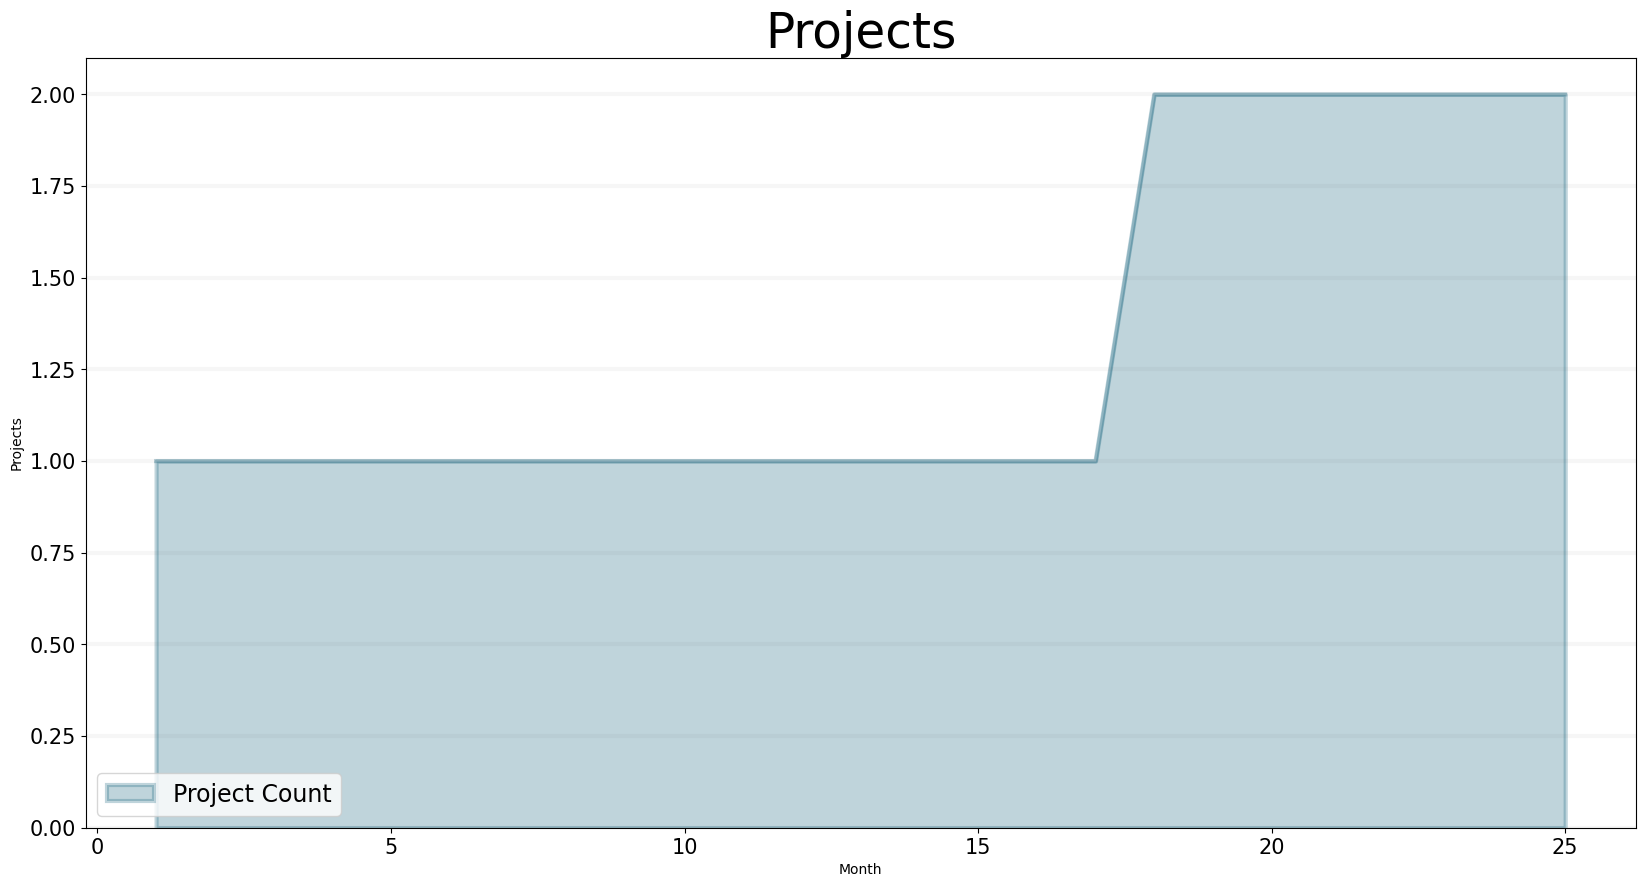

In [9]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_4"],
    title="Projects",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["projects"],
    agent_property_types=["total"],
    
    series_names={
         "smEDT_story_4_controlling_active_projects_total" : "Project Count"
     },
     x_label="Month",
    y_label="Projects",
)

This leads to more revenue:

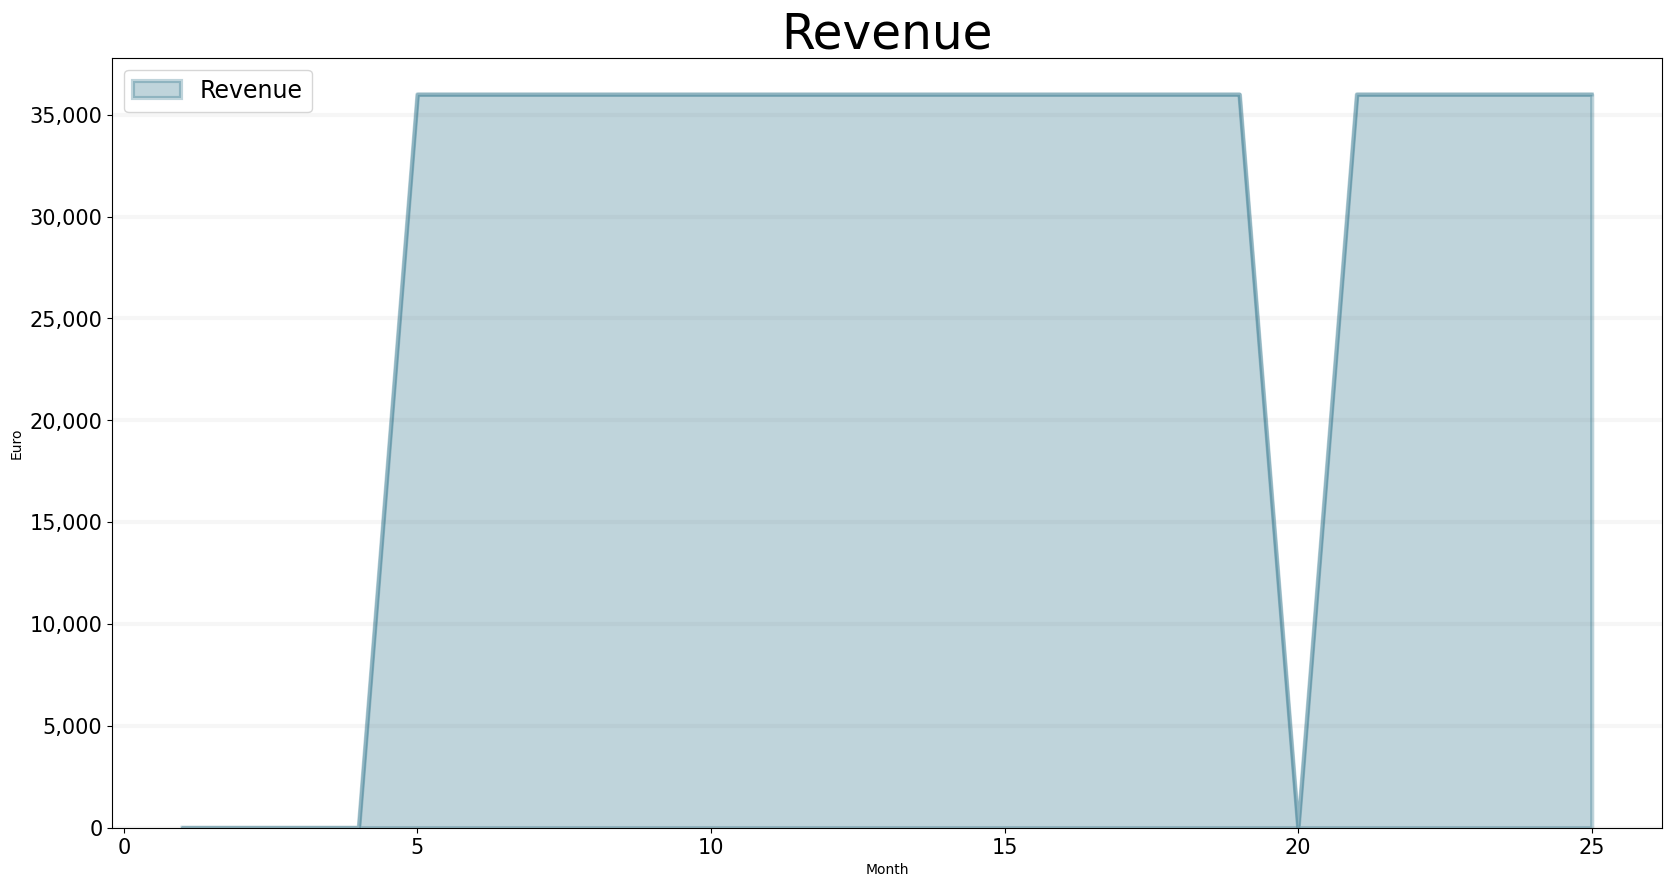

In [10]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_4"],
    title="Revenue",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["revenue"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_4_controlling_active_revenue_total" : "Revenue"
     },
     x_label="Month",
    y_label="Euro",

)

But because the only revenue that is "certain" is the one that was initially contracted, the risk associated with the revenue goes up as time passes: this is because project extensions and follow-on projects aren't guaranteed to happen, they have a probability < 1.0 attached to them.

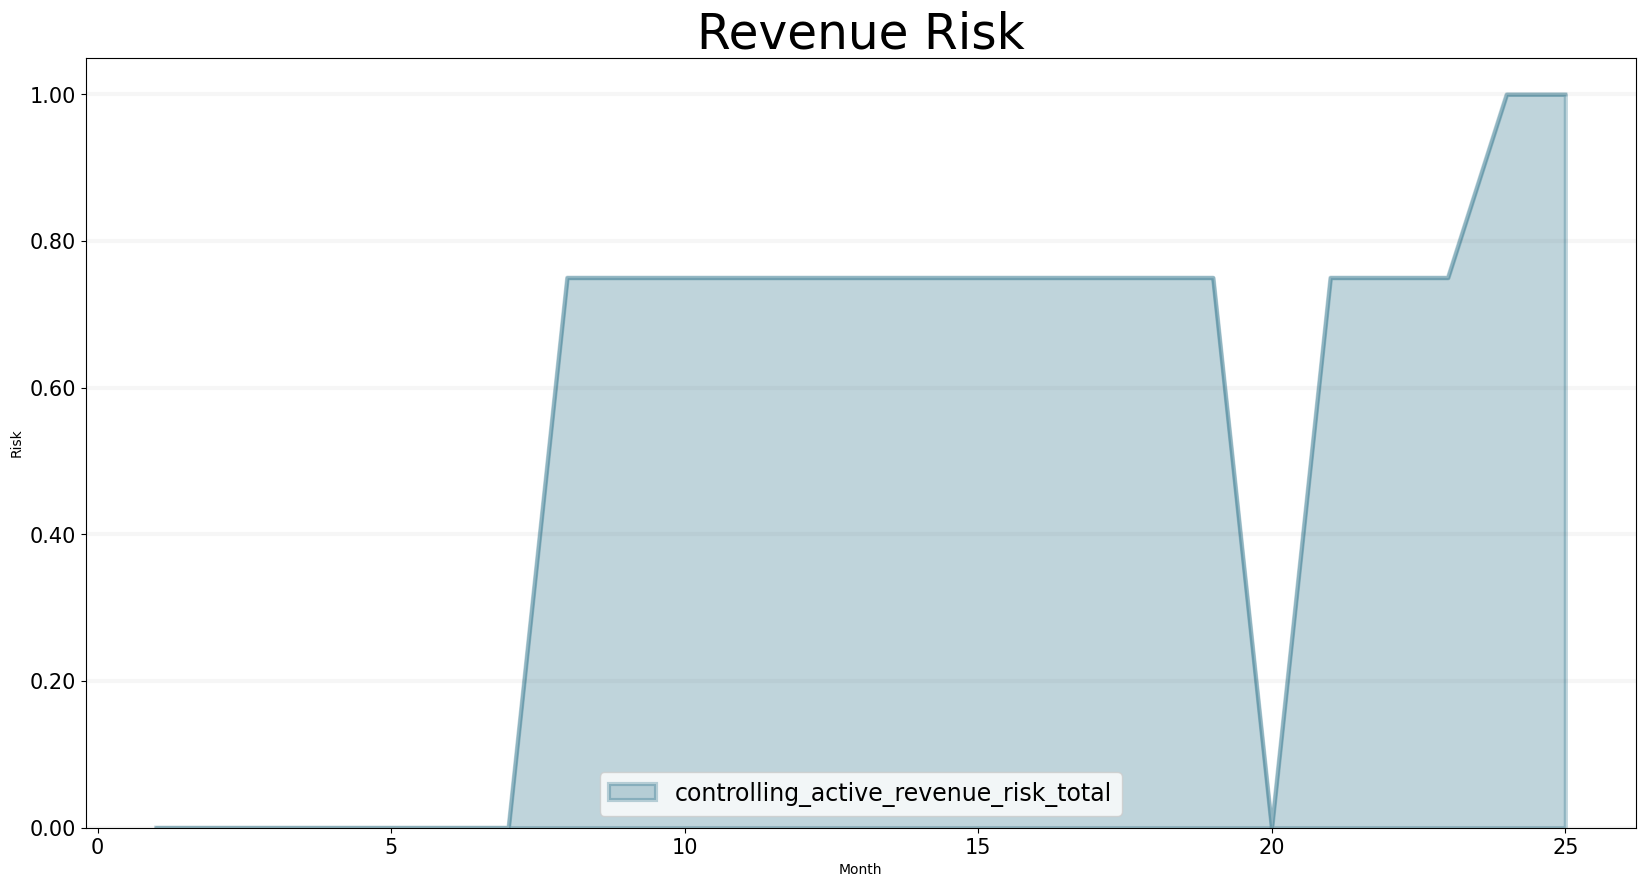

In [11]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_4"],
    title="Revenue Risk",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["revenue_risk"],
    agent_property_types=["total"],
     x_label="Month",
    y_label="Risk",

)

In practice, working with the revenue risk concept is very useful - but sometimes we explicitly want to see how much of the future revenue is actually certain (via actual contracts) and how much revenue is speculative.

We can achieve this by specifing a revenue risk level - the plot below shows revenues for 0% risk and 50% risk levels.

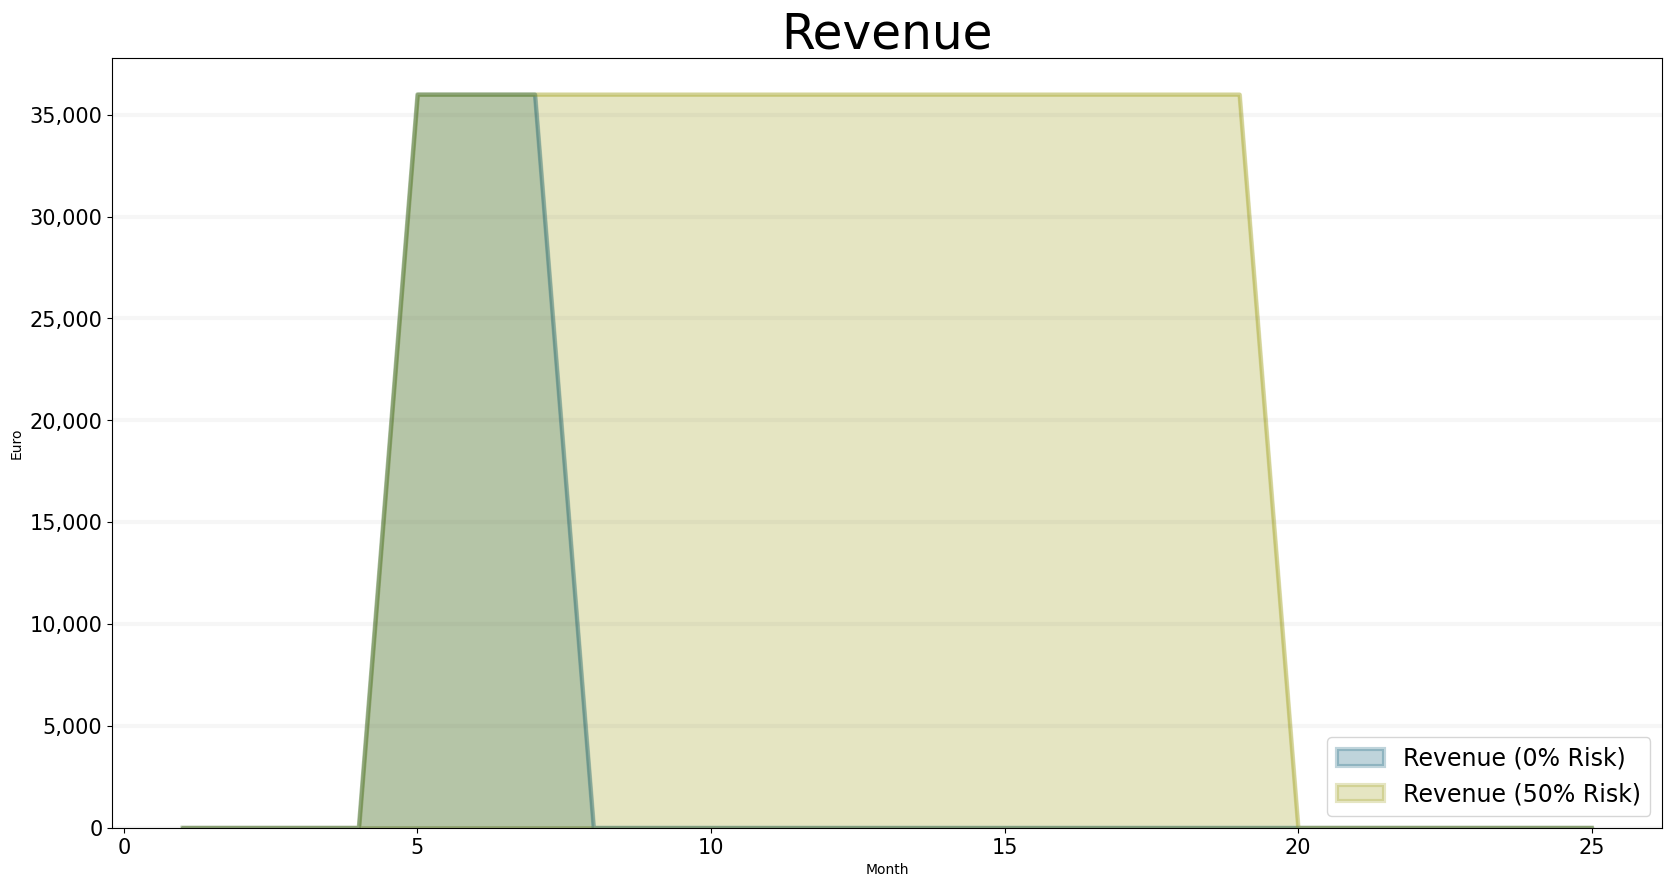

In [12]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_4_risk_0","story_4_risk_0_5"],
    title="Revenue",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["revenue"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_4_risk_0_controlling_active_revenue_total" : "Revenue (0% Risk)",
        "smEDT_story_4_risk_0_5_controlling_active_revenue_total" : "Revenue (50% Risk)"
     },
     x_label="Month",
    y_label="Euro",

)

### Key Performance Indicators for Professional Service Firms

Now let's make it more interesting by adding consultants (10 all together) and projects: we'll start with two projects that require two consultants (so our utilization will be low initially) and assume that three more projects start after three months.

Let's examine how the company now performs using the performance indicators introduced above.

The first thing to look at is how our consulting capacity develops and to compare this to the number of projects - we can immediately see that during the first six months, demand is to low and we have an overcapacit of four consulting FTEs:

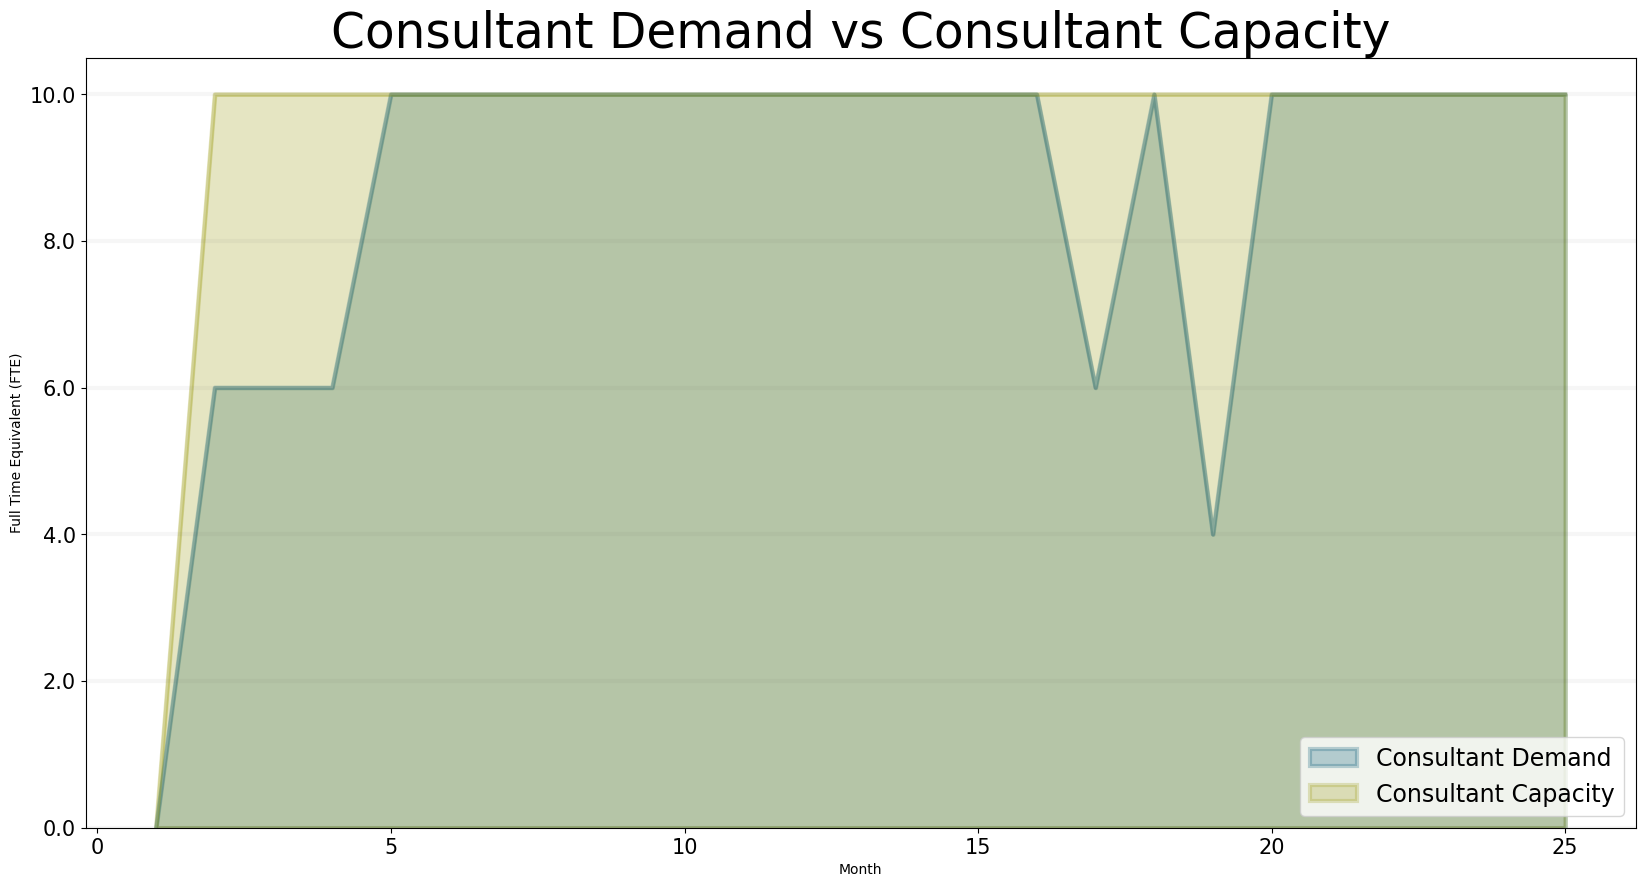

In [13]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_5"],
    title="Consultant Demand vs Consultant Capacity",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["consultant_demand","consultant_capacity_fte"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_5_controlling_active_consultant_demand_total" : "Consultant Demand",
        "smEDT_story_5_controlling_active_consultant_capacity_fte_total" : "Consultant Capacity"
     },
     x_label="Month",
    y_label="Full Time Equivalent (FTE)"

)

This is also reflected in the next chart, which shows the companies utilization rate, both on a monthly basis and as a cumulative "to date" measure. The utilzation rate measures how much of a consultants time is spent working on client projects. Because only the work on client projects genereates revenue, a high utilzation rate is desirable (but don't forget that consultants are also needed to acquire new clients and generate new business, so we should leave time for that).

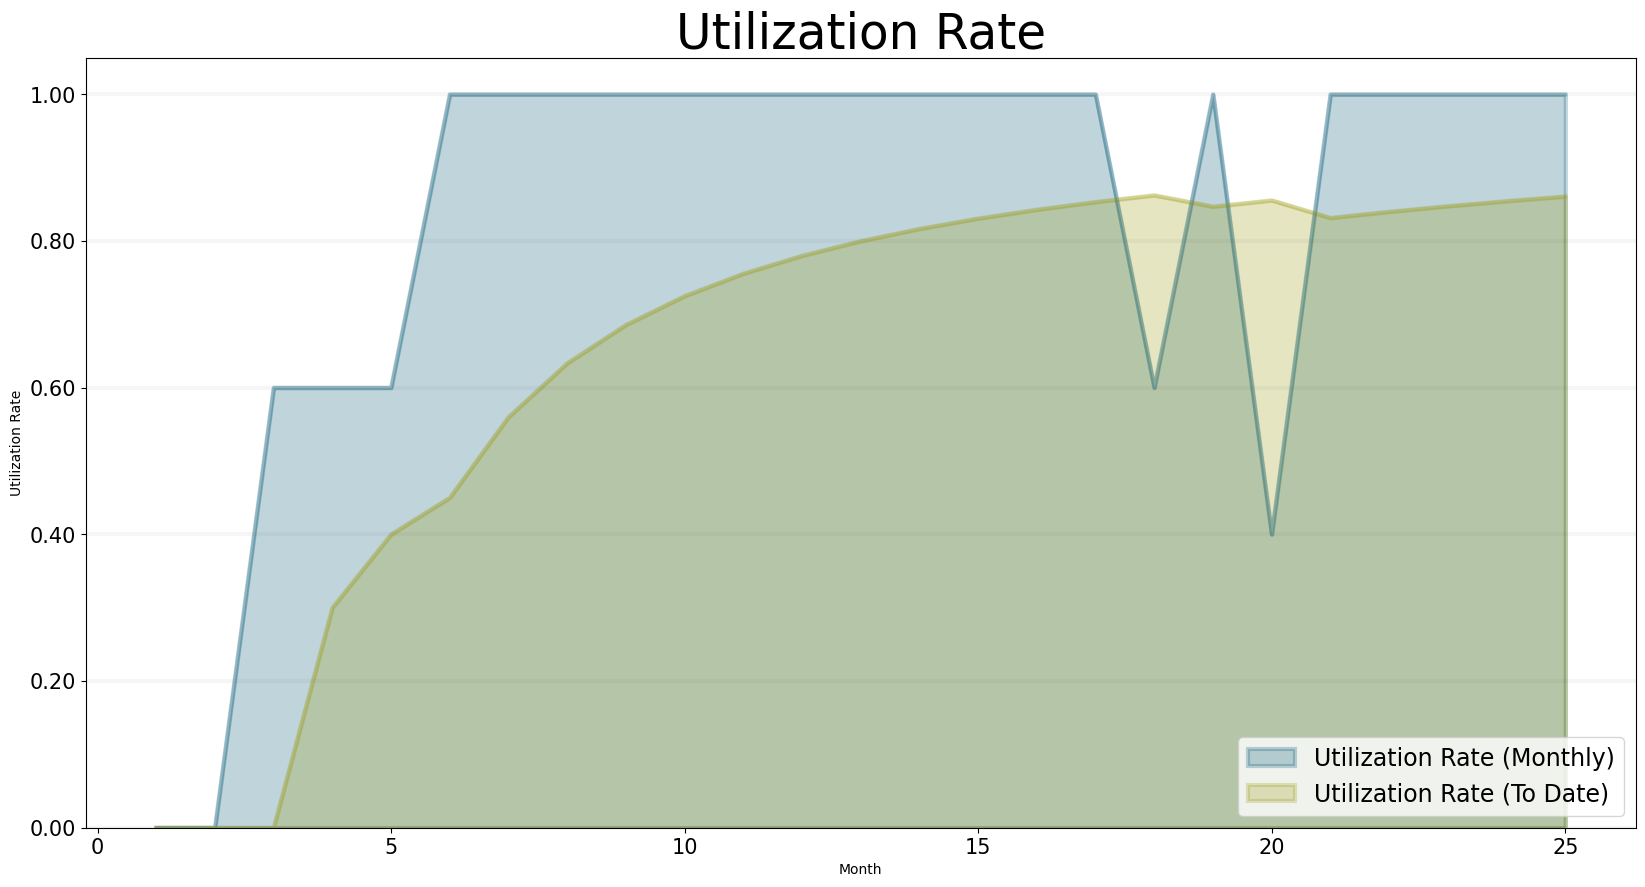

In [10]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_5"],
    title="Utilization Rate",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["avg_utilization","overall_avg_utilization"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_5_controlling_active_avg_utilization_total" : "Utilization Rate (Monthly)",
        "smEDT_story_5_controlling_active_overall_avg_utilization_total" : "Utilization Rate (To Date)"
     },
    
     x_label="Month",
    y_label="Utilization Rate",


)

The chart above reflects daily life in a consulting firm quite nicely: we can see utilization is bad at the beginning (which would lead to a flurry of marketing and sales activities). Then utilization picks up and by month 15 the utilization rate reaches 0.8 ... month 17 and 19 show quite a lot of fluctuation, which in reality would be quite tense times ... before utiliziation picks up again.

The utilization rate is by far the most important operative measure which needs to be monitored very closely.

The next chart shows the daily consulting fees - needless to say this is an important measure, because it directly impacts revenue. In practice the daily rates are often fixed by contracts etc. and it takes quite some to change them. Hence as a KPI, this is more relevant from a long-term strategic perspective and not so much from an operative perspective.

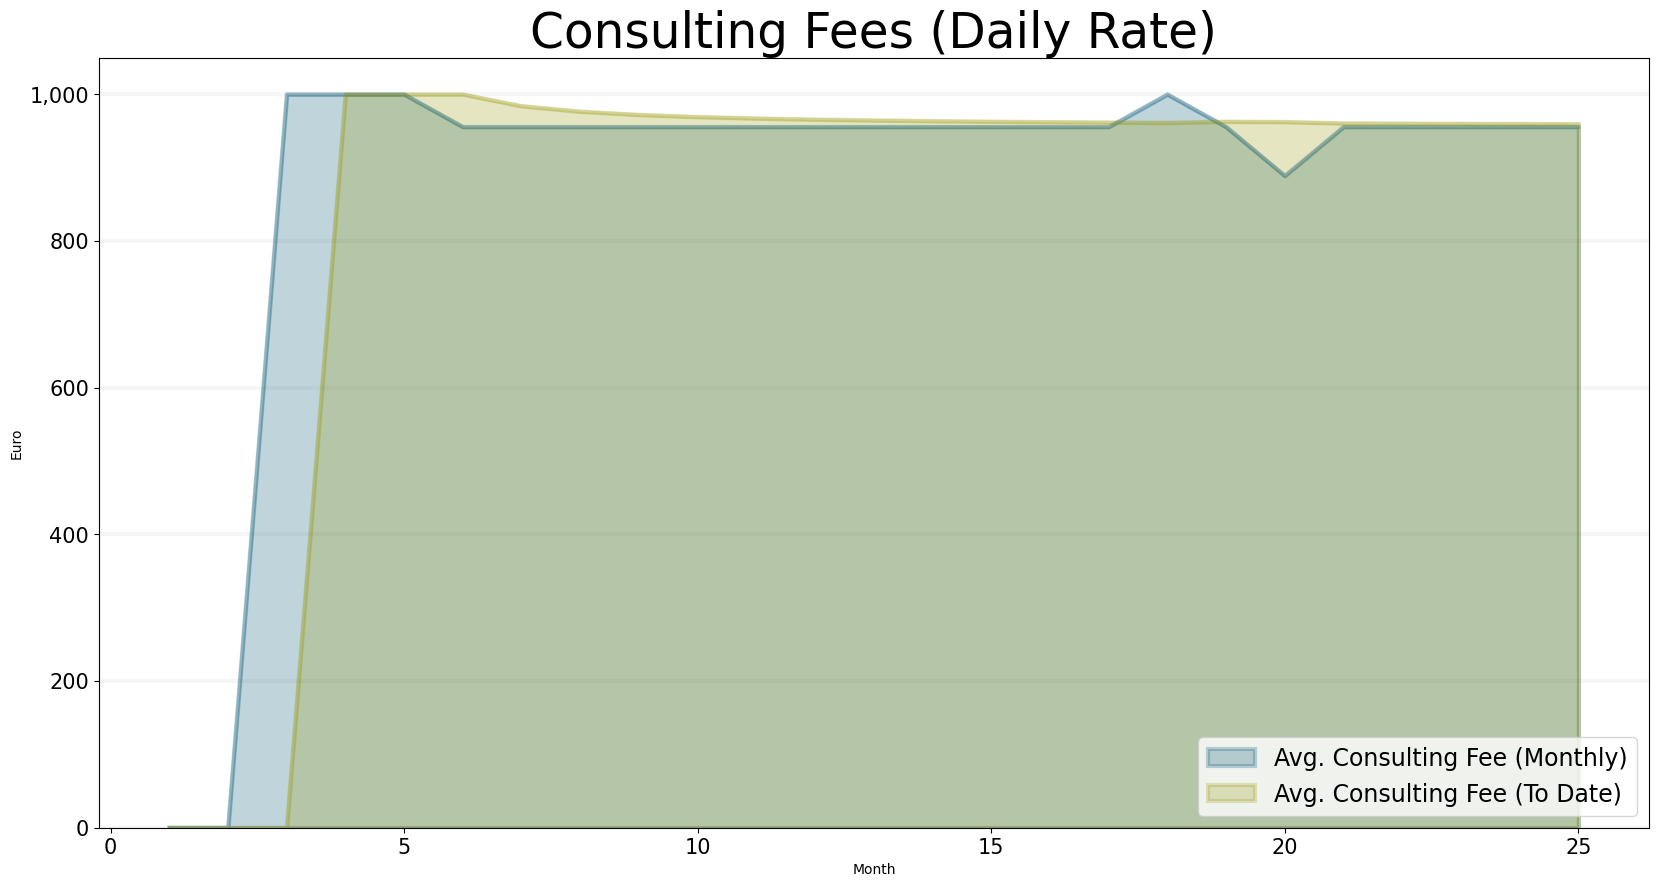

In [11]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_5"],
    title="Consulting Fees (Daily Rate)",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["avg_consulting_fee","overall_avg_consulting_fee"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_5_controlling_active_avg_consulting_fee_total" : "Avg. Consulting Fee (Monthly)",
        "smEDT_story_5_controlling_active_overall_avg_consulting_fee_total" : "Avg. Consulting Fee (To Date)"
     },
     x_label="Month",
    y_label="Euro",

)

The most important operative measure is the cash flow - whatever happens, we must ensure that we spend less money then we receive. The graph below shows that our company didn't to a good job here - because our utilization rate was bad during the first six months, we lost a lot of money. 

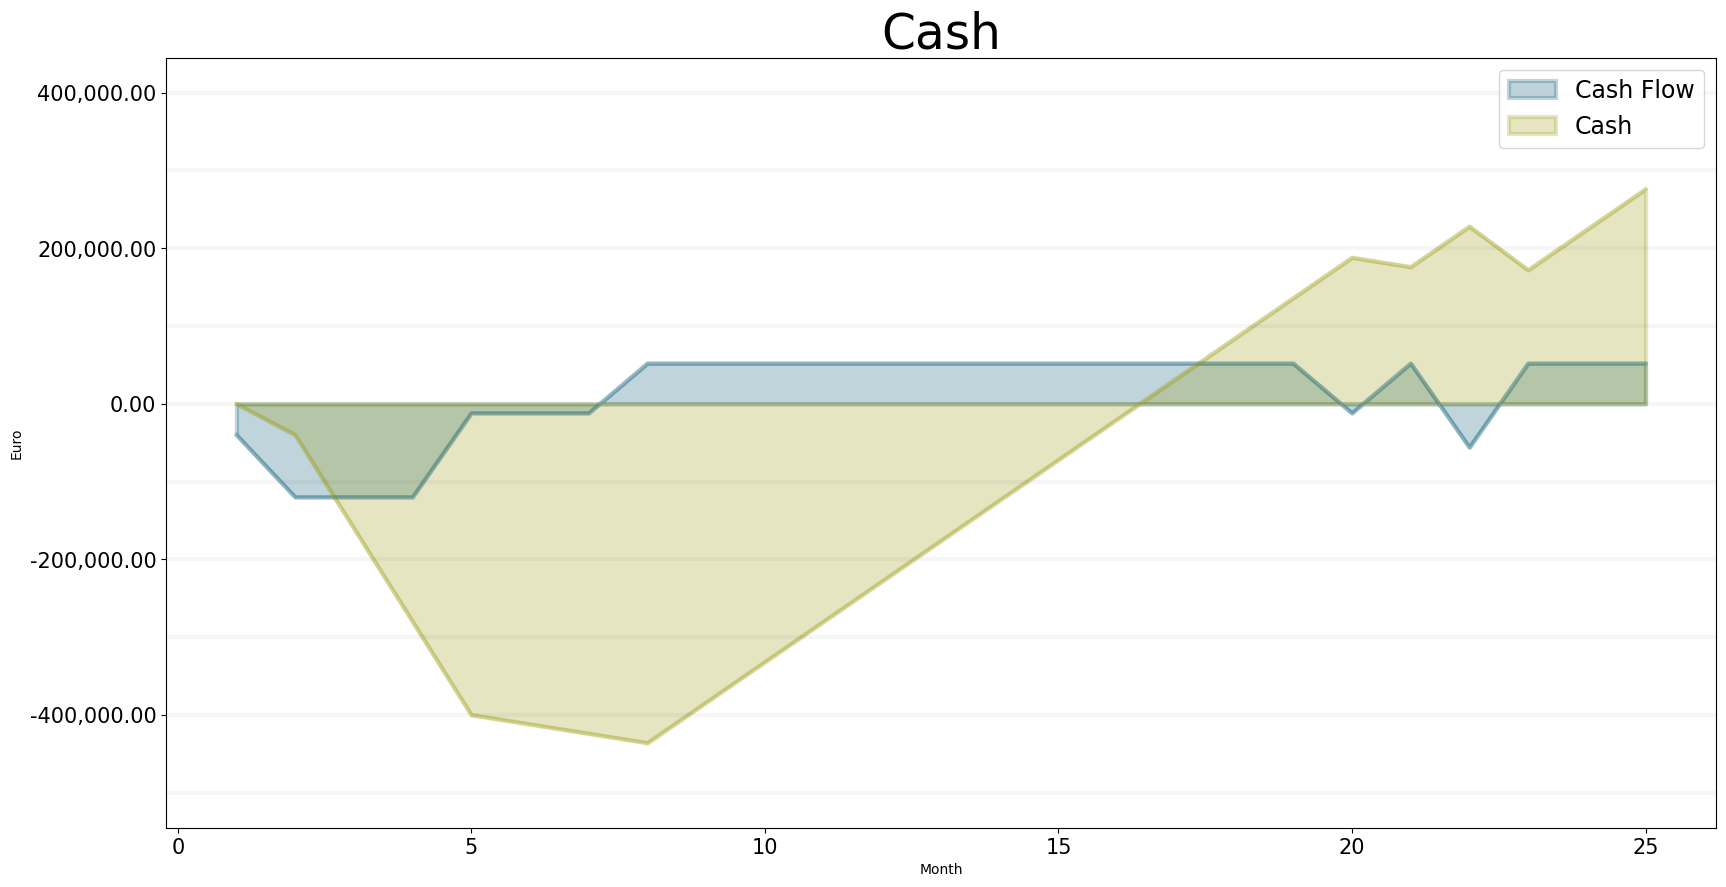

In [16]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_5"],
    title="Cash",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["cash_flow","cash"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_5_controlling_active_cash_flow_total" : "Cash Flow",
        "smEDT_story_5_controlling_active_cash_total" : "Cash"
     },
     x_label="Month",
    y_label="Euro"

)

Cash flow starts picking up in month six, but the chart below shows that it takes 15 months before our cash reaches its original level – that is a very long time and it is doubtful the company would survive this, unless the projected revenues where fairly certain.

Unfortunately our revenue risk chart shows that there is quite a lot of risk attached to this revenue ... so unless the company had a really good track record it really is doubtful that it would survive.

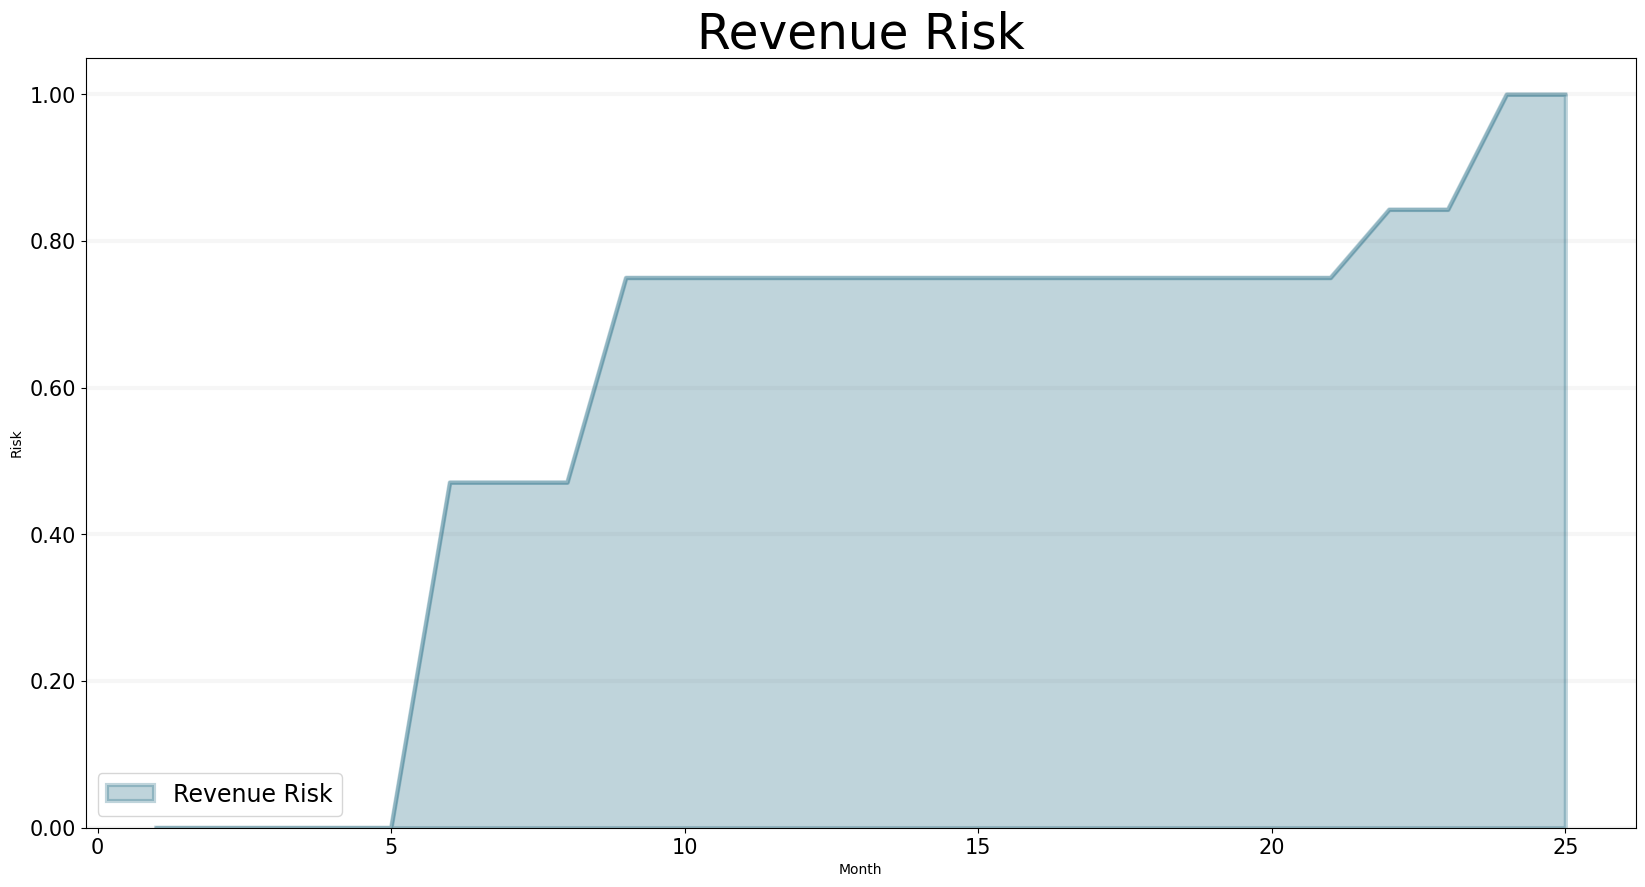

In [57]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_5"],
    title="Revenue Risk",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["revenue_risk"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_5_controlling_active_revenue_risk_total" : "Revenue Risk"
     },
     x_label="Month",
    y_label="Risk"

)

Finally, we take a look at the profit margins and earnings - the final profit margin of around 15% looks quite acceptable, but it does take a long time to get there.

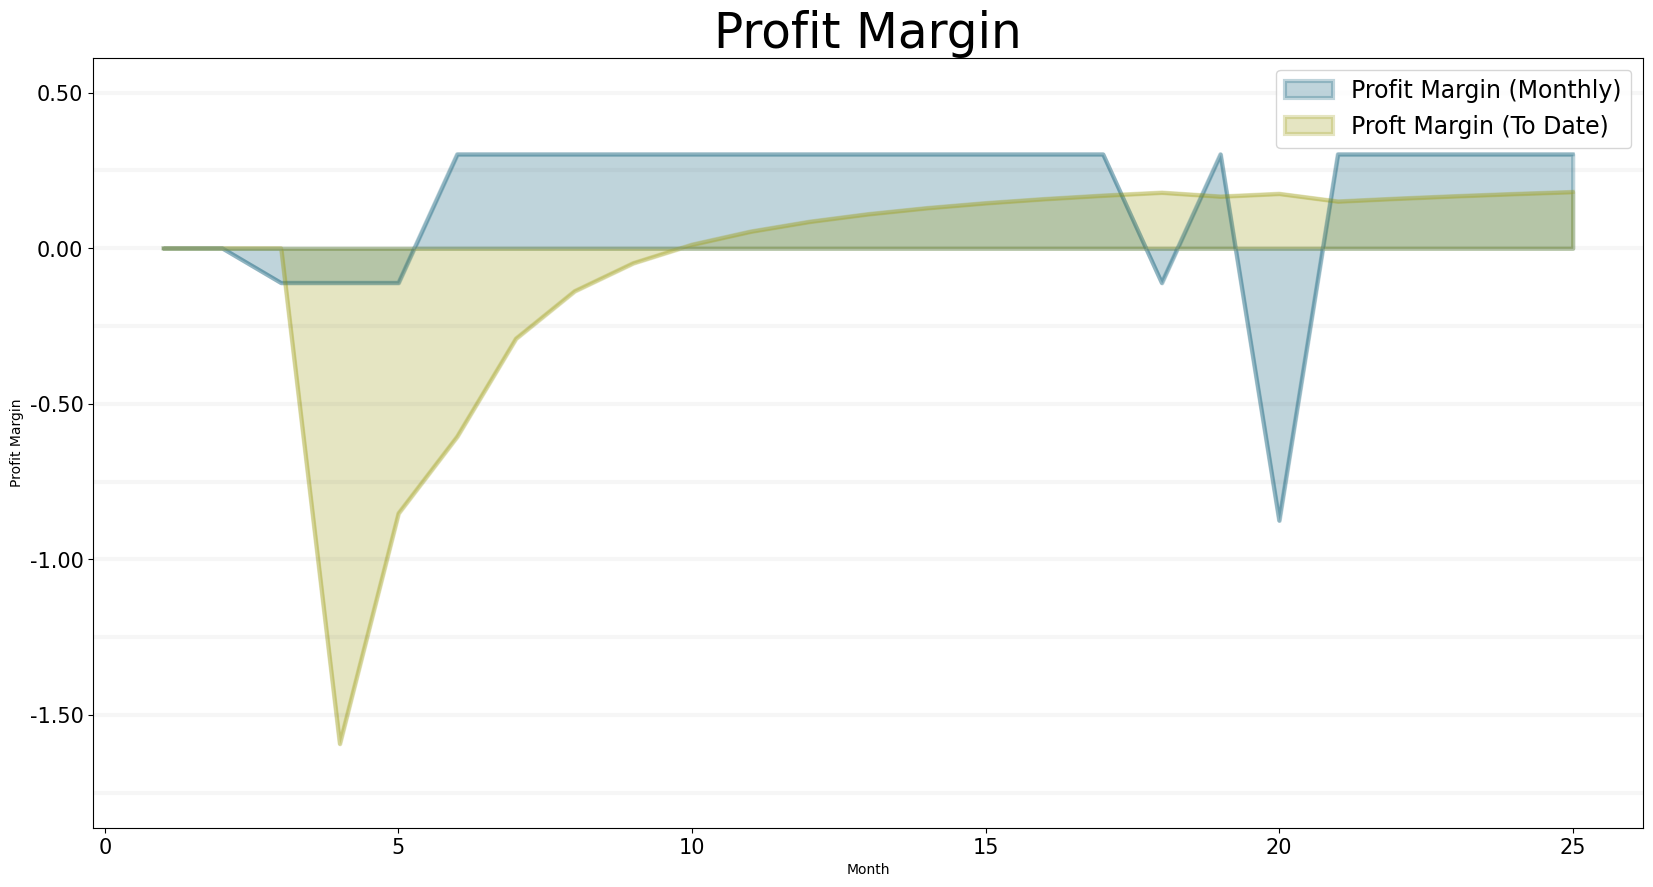

In [56]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_5"],
    title="Profit Margin",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["profit_margin","overall_profit_margin"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_5_controlling_active_profit_margin_total" : "Profit Margin (Monthly)",
        "smEDT_story_5_controlling_active_overall_profit_margin_total" : "Profit Margin (To Date)"
     },
     x_label="Month",
    y_label="Profit Margin",

)

Our final chart plots our accumulated revenue, accumulated expenses and accumulated earnings: we make a modest profit at the end of the first year, despite our poor utilization at the beginning of the year,

If you compare the earnings chart to the cash chart you will notice that our cash position looks much worse than the accumulated earnings - this is because we are assuming a collection time of two months, i.e. it takes two months for revenue to arrive in our bank account.

Two months collection time is quite realistic and this illustrates nicely why – from an operational perspective – cash and cash flow are more relevant then earnings.

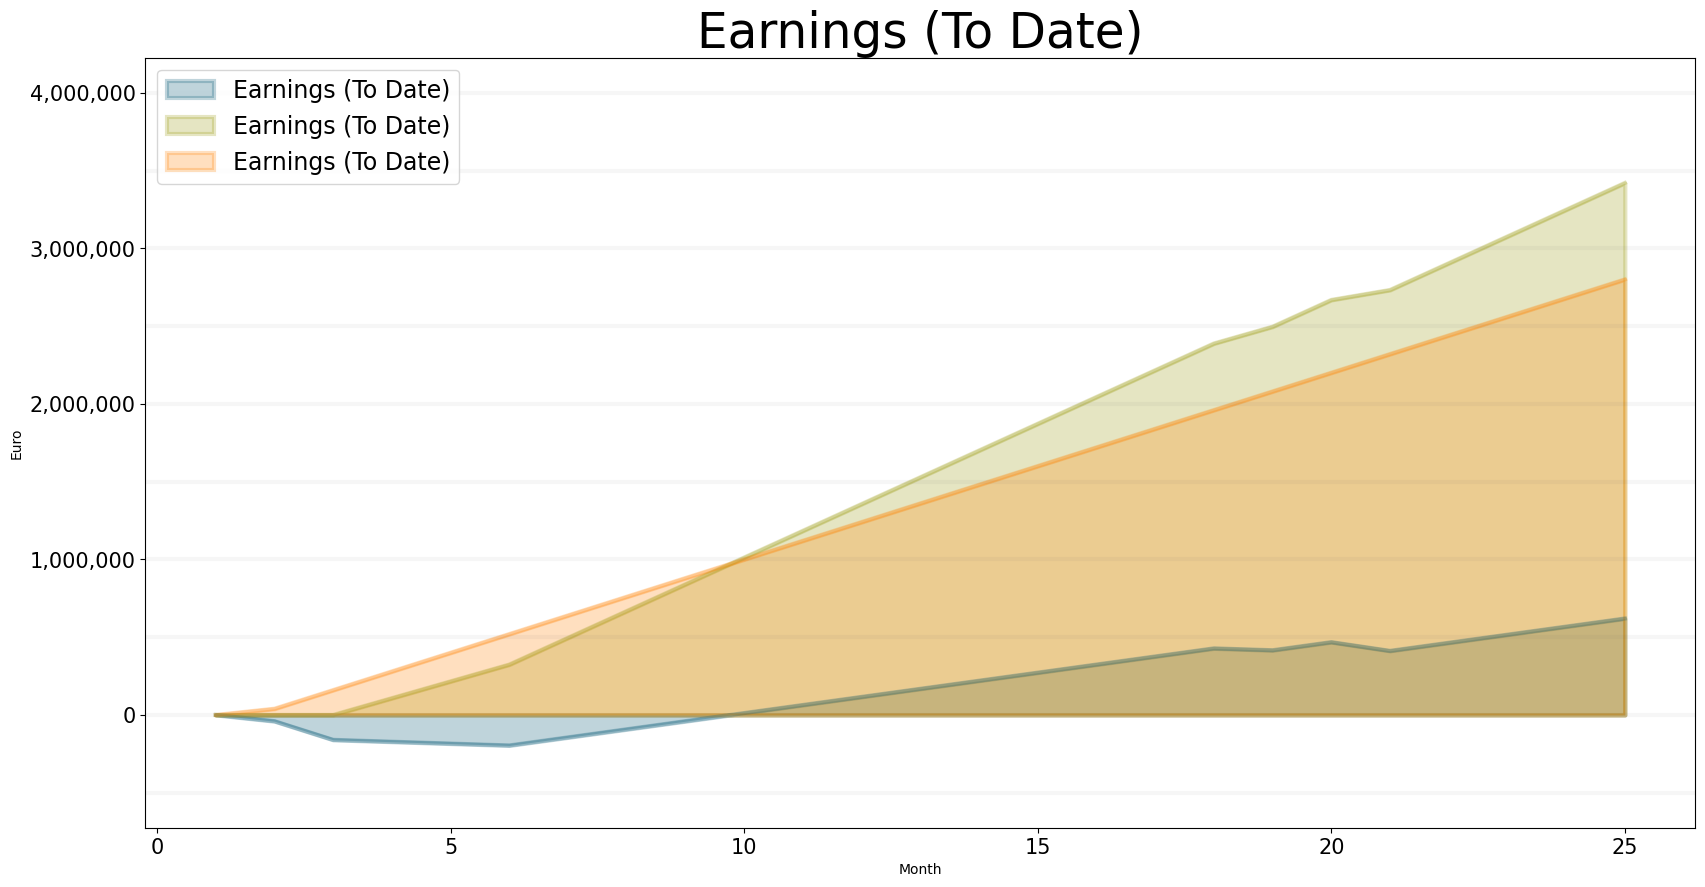

In [22]:
bptk.plot_scenarios(
    scenario_managers=["smEDT"],
    kind="area",
    scenarios=["story_5"],
    title="Earnings (To Date)",
    agents=["controlling"],
    agent_states=["active"],
    agent_properties=["accumulated_earnings","accumulated_revenue","accumulated_expenses"],
    agent_property_types=["total"],
    series_names={
         "smEDT_story_5_controlling_active_accumulated_earnings_total" : "Earnings (To Date)",
         "smEDT_story_5_controlling_active_accumulated_revenue_total" : "Earnings (To Date)",
         "smEDT_story_5_controlling_active_accumulated_expenses_total" : "Earnings (To Date)"
    },
     x_label="Month",
    y_label="Euro",


)

## Putting It All Together: Interactive Dashboard

The dashboard below is build entirely using __BPTK__ and the standard [ipywidgets](https://ipywidgets.readthedocs.io) library - while it is not a "high end" dashboard, it shows nicely what can be done using the Jupyter notebook environment.

The scenario is calibrated to provide "full" utilization of six consultants via three projects, the simulation runs over 24 months at a granularity of 1 week. The consultants start with zero projects and it takes two weeks for them to become assigned to a project, which is why the company looses a little money in the first month - note how long it takes for the level of cash to break even again.

Here are a few experiments for you to try - in each experiemnt, you first need to adjust the appropriate setting and then hit the run button to re-run the scenario:

1. Increase billing rates on all three projects by 10%, i.e. from  € 1000 to € 1100.
    * What is the percentage increate of your revenue?
    * What is the percentage increase of your earnings?
2. Decrease billing rates on all three projects by 10%, i.e. from € 1000 to € 900
    * What is the percentage decreate of your revenue?
    * What is the percentage decrease of your earnings?
3. Reset the billing rates to €1000 on each project
4. Halve the contracted effort on each project, i.e. from 48 to 24 months
    * How does this affect your profit margin?
    * How does the revenue risk level change?
5. Change the deadline on each project from 26 to 18
    * How does this affect your KPIs?
    * How does the revenue risk level change?
6. Change the revenue risk level to 0.5 in the scenario settings
    * How does this affect your KPIs?
7. Change the revenue risk level to 0.0 in the scenario settings
    * How does this affect your KPIs?
8. Change the risk level back to 1.0
9. Put the start date of Project 1 to month 4
    * How does this affect your utilization?
    * How long does it take for cash to break even?


In [1]:
from BPTK_Py.bptk import bptk 

bptk = bptk()

In [2]:
%run src/dashboard.ipy

### Data Export 

In [3]:
df=bptk.plot_scenarios(
            scenario_managers=["smEDT"],
            kind="area",
            scenarios=["interactive"],
            title="Capacity vs Demand",
            agents=["controlling"],
            agent_states=["active"],
            agent_properties=[
                "consultant_demand",
                "consultant_capacity_fte",
                "avg_utilization",
                "overall_avg_utilization",
                "profit_margin",
                "overall_profit_margin",
                "avg_consulting_fee",
                "overall_avg_consulting_fee",
                "cash",
                "cash_flow",
                "earnings",
                "revenue",
                "expenses",
                "revenue_risk",
                "accumulated_earnings",
                "accumulated_expenses",
                "accumulated_revenue",
                "overall_profit_margin",
                "overall_avg_utilization",
                "overall_avg_consulting_fee"
            ],
            agent_property_types=["total"],
            series_names={
                "smEDT_interactive_controlling_active_consultant_demand_total" : "consultant_demand",
                "smEDT_interactive_controlling_active_consultant_capacity_fte_total" : "consultant_capacity_fte",
                "smEDT_interactive_controlling_active_avg_utilization_total" : "avg_utilization",
                "smEDT_interactive_controlling_active_overall_avg_utilization_total" : "overall_avg_utilization",
                "smEDT_interactive_controlling_active_profit_margin_total" : "profit_margin",
                "smEDT_interactive_controlling_active_overall_profit_margin_total" : "overall_profit_margin",
                "smEDT_interactive_controlling_active_avg_consulting_fee_total" : "avg_consulting_fee",
                "smEDT_interactive_controlling_active_overall_avg_consulting_fee_total" : "overall_avg_consulting",
                "smEDT_interactive_controlling_active_cash_total" : "cash",
                "smEDT_interactive_controlling_active_cash_flow_total" : "cash_flow",
                "smEDT_interactive_controlling_active_earnings_total" : "earnings",
                "smEDT_interactive_controlling_active_revenue_total" : "revenue",
                "smEDT_interactive_controlling_active_expenses_total" : "expenses",
                "smEDT_interactive_controlling_active_revenue_risk_total" : "revenue_risk",
                 "smEDT_interactive_controlling_active_accumulated_earnings_total" : "accumulated_earnings",
                "smEDT_interactive_controlling_active_accumulated_expenses_total" : "accumulated_expenses",
                 "smEDT_interactive_controlling_active_accumulated_revenue_total" : "accumulated_revenue",
                 "smEDT_interactive_controlling_active_overall_profit_margin_total" : "overall_profit_margin",
                 "smEDT_interactive_controlling_active_overall_avg_utilization_total" : "overall_avg_utilization",
                 "smEDT_interactive_controlling_active_overall_avg_consulting_fee_total" : "overall_avg_consulting_fee"
            },
    return_df=True
        )

In [23]:
df

,consultant_demand,consultant_capacity_fte,avg_utilization,overall_avg_utilization,profit_margin,overall_profit_margin,avg_consulting_fee,overall_avg_consulting_fee,cash,cash_flow,earnings,revenue,expenses,revenue_risk,accumulated_earnings,accumulated_expenses,accumulated_revenue
t,,,,,,,,,,,,,,,,,
1.00,0.0,6.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,-22000.0,-22000.0,0.0,22000.0,0.0,0.0,0.0,0.0
1.25,6.0,6.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,-22000.0,-22000.0,-22000.0,0.0,22000.0,0.0,-22000.0,22000.0,0.0
1.50,6.0,6.0,1.0,0.000000,0.185185,0.000000,1000.0,0.0,-44000.0,-22000.0,5000.0,27000.0,22000.0,0.0,-44000.0,44000.0,0.0
1.75,6.0,6.0,1.0,0.333333,0.185185,-1.444444,1000.0,1000.0,-66000.0,-22000.0,5000.0,27000.0,22000.0,0.0,-39000.0,66000.0,27000.0
2.00,6.0,6.0,1.0,0.500000,0.185185,-0.629630,1000.0,1000.0,-88000.0,5000.0,5000.0,27000.0,22000.0,0.0,-34000.0,88000.0,54000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24.75,6.0,6.0,1.0,0.978947,0.185185,0.167662,1000.0,1000.0,367000.0,5000.0,5000.0,27000.0,22000.0,0.0,421000.0,2090000.0,2511000.0
25.00,6.0,6.0,1.0,0.979167,0.185185,0.167849,1000.0,1000.0,372000.0,5000.0,5000.0,27000.0,22000.0,0.0,426000.0,2112000.0,2538000.0
25.25,6.0,6.0,1.0,0.979381,0.185185,0.168031,1000.0,1000.0,377000.0,5000.0,5000.0,27000.0,22000.0,0.0,431000.0,2134000.0,2565000.0


In [4]:
df.to_csv("~/Desktop/edt_data.csv")

### Using the Dashboard in Production

The dashboard presented above is useful to experiment with the __Enterprise Digital Twin__ while it is in development. Depending on the setup in your enterprise you could also deploy it production usage by an "end user", e.g. using a Jupyter Hub Server or Voila.

The approach we take at transentis is to separate the frontend presentation logic entirely from the backend - that way we can use "state of the art" technology for the front end and concentrate on the business logic in the backend.

![Enterprise Digital Twin Architecture](images/edt_architecture.svg)

We serve up the digital twin simulation using the [BPKT API Server](../../api/api_bptk_server/api_bptk_server.ipynb)) and use the low-code development plattform [Appsmith](https://www.appsmith.com) for the front-end. Appsmith also provides us with user management. We use it for most of our "internal" applications and that way our users have a single point of access.

We feed the API server the correct initial settings using a scenario file we generate on the fly (based on transentis "as is" situation, which we read from our data warehouse) and can then look at how our business might develop using the dashboard. For this we have a separate "reporting server" which sits between the frontend and the digital twin backend. The diagram below shows illustrates this architecture. 

## Open Issues and Next Steps

Our experiments above show how we can prototype the business logic of a professional service firm (PSF) using an _Enterprise Digital Twin_ buit using a mixed Agent-based and System Dynamics modeling approach. 

In its current state, the digital twin captures the core business of the PSF: delivering consulting services via projects and consultants.

The model is still quite high-level, but it is complete in the sense that it already allows us to evaluate the four key KPIs of a consulting business: the consultant capacity, consultant utilization, the avg daily consulting fee and the average earnings per consultant.

What will the next steps be?

To capture the everday reality of a consultancy, we need to be a little more detailed regarding the core business: 

* allowing for different seniority levels among consultants, along with differentiated consulting fees.
* taking a more differentiated view of consultant availability - currently we are assuming consultants are available full time. But new consultants will be enter the company and some may also leave, consultants may only be working part time and – for more precise cash flow predictions – we will need to model vacations in more detail.

Once we have these aspects built in, we will be able to make predictions of how our consulting business will develop given the current staff level and project contracts.

But obviously we want to see our company grow and thrive, and for this we also need to think about two other key aspects of the consulting business: acquiring new customers and recruiting and training new consultants.

# Further Reading

Our thinking on Professional Services firms and the relevant KPIs was originally inspired by David Maister's excellent work, in particular _True Professionalism_ and _Managing The Professional Service Firm_.